We are considering Yellow Taxi data for June



# Data Importing and Data Summarisation

In [ ]:
# import important libraries - matplotlib, seaborn and pandas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# yellow taxi data
file_loc1 = '/content/drive/MyDrive/Onelearn/EDA and Visulisation/W8D3/Lessons/yellow_tripdata_2020-06.parquet'
trip_data = pd.read_parquet(file_loc1)

In [ ]:
trip_data.to_csv('/content/drive/MyDrive/Onelearn/EDA and Visulisation/W8D3/Lessons/yellow_tripdata_2020-06.csv')

In [ ]:
# read file
trip_data = pd.read_csv('/content/drive/MyDrive/Onelearn/EDA and Visulisation/W8D3/Lessons/yellow_tripdata_2020-06.csv')
trip_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,1,2020-06-01 00:31:23,2020-06-01 00:49:58,1.0,3.6,1.0,N,140,68,1,15.5,3.0,0.5,4.00,0.0,0.3,23.30,2.5,NaN
1,1,1,2020-06-01 00:42:50,2020-06-01 01:04:33,1.0,5.6,1.0,N,79,226,1,19.5,3.0,0.5,2.00,0.0,0.3,25.30,2.5,NaN
2,2,1,2020-06-01 00:39:51,2020-06-01 00:49:09,1.0,2.3,1.0,N,238,116,2,10.0,0.5,0.5,0.00,0.0,0.3,11.30,0.0,NaN
3,3,1,2020-06-01 00:56:13,2020-06-01 01:11:38,1.0,5.3,1.0,N,141,116,2,17.5,3.0,0.5,0.00,0.0,0.3,21.30,2.5,NaN
4,4,1,2020-06-01 00:16:41,2020-06-01 00:29:30,1.0,4.4,1.0,N,186,75,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,NaN


In [ ]:
trip_data.shape

(549797, 20)

In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549797 entries, 0 to 549796
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             549797 non-null  int64  
 1   VendorID               549797 non-null  int64  
 2   tpep_pickup_datetime   549797 non-null  object 
 3   tpep_dropoff_datetime  549797 non-null  object 
 4   passenger_count        499079 non-null  float64
 5   trip_distance          549797 non-null  float64
 6   RatecodeID             499079 non-null  float64
 7   store_and_fwd_flag     499079 non-null  object 
 8   PULocationID           549797 non-null  int64  
 9   DOLocationID           549797 non-null  int64  
 10  payment_type           549797 non-null  int64  
 11  fare_amount            549797 non-null  float64
 12  extra                  549797 non-null  float64
 13  mta_tax                549797 non-null  float64
 14  tip_amount             549797 non-nu

# Data Cleaning and Manipulation Steps

In [ ]:
trip_data.drop(['Unnamed: 0','VendorID','RatecodeID','store_and_fwd_flag','airport_fee','congestion_surcharge',],axis = 1, inplace =True)

In [ ]:
trip_data['tpep_pickup_datetime'] = pd.to_datetime(trip_data['tpep_pickup_datetime'])
trip_data['tpep_dropoff_datetime'] = pd.to_datetime(trip_data['tpep_dropoff_datetime'])

In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549797 entries, 0 to 549796
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   tpep_pickup_datetime   549797 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  549797 non-null  datetime64[ns]
 2   passenger_count        499079 non-null  float64       
 3   trip_distance          549797 non-null  float64       
 4   PULocationID           549797 non-null  int64         
 5   DOLocationID           549797 non-null  int64         
 6   payment_type           549797 non-null  int64         
 7   fare_amount            549797 non-null  float64       
 8   extra                  549797 non-null  float64       
 9   mta_tax                549797 non-null  float64       
 10  tip_amount             549797 non-null  float64       
 11  tolls_amount           549797 non-null  float64       
 12  improvement_surcharge  549797 non-null  floa

In [ ]:
trip_data.dropna(inplace = True)

In [ ]:
trip_data['passenger_count'] = trip_data['passenger_count'].astype(int)

In [ ]:
# create 'duration' column using pd.Timedelta(minutes=1)
trip_data['duration'] = (trip_data['tpep_dropoff_datetime'] - trip_data['tpep_pickup_datetime'])/ pd.Timedelta(minutes=1)
# create 'trip_pickup_hour' column using 'tpep_pickup_datetime' column
trip_data['trip_pickup_hour'] = trip_data['tpep_pickup_datetime'].dt.hour
# create 'trip_dropoff_hour' column using 'tpep_dropoff_datetime' column
trip_data['trip_dropoff_hour'] = trip_data['tpep_dropoff_datetime'].dt.hour
# create 'trip_day' column using 'tpep_pickup_datetime' column - use day_name()
trip_data['trip_day'] = trip_data['tpep_pickup_datetime'].dt.day_name()
# print data info
print(trip_data.info())
# print data head
trip_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499079 entries, 0 to 499078
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   tpep_pickup_datetime   499079 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  499079 non-null  datetime64[ns]
 2   passenger_count        499079 non-null  int64         
 3   trip_distance          499079 non-null  float64       
 4   PULocationID           499079 non-null  int64         
 5   DOLocationID           499079 non-null  int64         
 6   payment_type           499079 non-null  int64         
 7   fare_amount            499079 non-null  float64       
 8   extra                  499079 non-null  float64       
 9   mta_tax                499079 non-null  float64       
 10  tip_amount             499079 non-null  float64       
 11  tolls_amount           499079 non-null  float64       
 12  improvement_surcharge  499079 non-null  floa

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day
0,2020-06-01 00:31:23,2020-06-01 00:49:58,1,3.6,140,68,1,15.5,3.0,0.5,4.00,0.0,0.3,23.30,18.583333,0,0,Monday
1,2020-06-01 00:42:50,2020-06-01 01:04:33,1,5.6,79,226,1,19.5,3.0,0.5,2.00,0.0,0.3,25.30,21.716667,0,1,Monday
2,2020-06-01 00:39:51,2020-06-01 00:49:09,1,2.3,238,116,2,10.0,0.5,0.5,0.00,0.0,0.3,11.30,9.300000,0,0,Monday
3,2020-06-01 00:56:13,2020-06-01 01:11:38,1,5.3,141,116,2,17.5,3.0,0.5,0.00,0.0,0.3,21.30,15.416667,0,1,Monday
4,2020-06-01 00:16:41,2020-06-01 00:29:30,1,4.4,186,75,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,12.816667,0,0,Monday


Now our Total_amount is basically Total_amount = fare_amount + tolls_amount + tip_amount + (extra + mta_tax + improvement_surcharge)

of the above components of total_amount we will specifically focus on 'fare_amount','tip_amount', 'tolls_amount' and 'total taxes'

In [ ]:
# create 'total_taxes' column from summing 'extra','mta_tax', 'improvement_surcharge'
trip_data['total_taxes'] = trip_data['extra']+trip_data['mta_tax']+trip_data['improvement_surcharge']
# drop 'extra','mta_tax','improvement_surcharge' columns
trip_data.drop(['extra','mta_tax','improvement_surcharge'],axis=1,inplace=True)
# print data head
trip_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
0,2020-06-01 00:31:23,2020-06-01 00:49:58,1,3.6,140,68,1,15.5,4.00,0.0,23.30,18.583333,0,0,Monday,3.8
1,2020-06-01 00:42:50,2020-06-01 01:04:33,1,5.6,79,226,1,19.5,2.00,0.0,25.30,21.716667,0,1,Monday,3.8
2,2020-06-01 00:39:51,2020-06-01 00:49:09,1,2.3,238,116,2,10.0,0.00,0.0,11.30,9.300000,0,0,Monday,1.3
3,2020-06-01 00:56:13,2020-06-01 01:11:38,1,5.3,141,116,2,17.5,0.00,0.0,21.30,15.416667,0,1,Monday,3.8
4,2020-06-01 00:16:41,2020-06-01 00:29:30,1,4.4,186,75,1,14.5,3.65,0.0,21.95,12.816667,0,0,Monday,3.8


For payment_type we have the following mapping for categories: 1= Credit card 2= Cash 3= No charge 4= Dispute 5= Unknown 6= Voided trip

let's just check if we have only these categories available in payment_type or not

In [ ]:
# value_counts for 'payment_type' column
trip_data['payment_type'].value_counts()

1    322582
2    168953
3      5257
4      2275
5        12
Name: payment_type, dtype: int64

In [ ]:
# function for mapping numerical payment_type to actual payment
def map_payment_type(x):
    if x==1:
        return 'Credit_card'
    elif x==2:
        return 'Cash'
    elif x==3:
        return 'No_charge'
    elif x==4:
        return 'Dispute'
    elif x==5:
        return 'Unknown'
    else:
        return 'Voided_trip'

# use .apply and lambda on payment_type column to change 'payment_type' column
trip_data['payment_type'] = trip_data.payment_type.apply(lambda x:map_payment_type(x))
# print data head
trip_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
0,2020-06-01 00:31:23,2020-06-01 00:49:58,1,3.6,140,68,Credit_card,15.5,4.00,0.0,23.30,18.583333,0,0,Monday,3.8
1,2020-06-01 00:42:50,2020-06-01 01:04:33,1,5.6,79,226,Credit_card,19.5,2.00,0.0,25.30,21.716667,0,1,Monday,3.8
2,2020-06-01 00:39:51,2020-06-01 00:49:09,1,2.3,238,116,Cash,10.0,0.00,0.0,11.30,9.300000,0,0,Monday,1.3
3,2020-06-01 00:56:13,2020-06-01 01:11:38,1,5.3,141,116,Cash,17.5,0.00,0.0,21.30,15.416667,0,1,Monday,3.8
4,2020-06-01 00:16:41,2020-06-01 00:29:30,1,4.4,186,75,Credit_card,14.5,3.65,0.0,21.95,12.816667,0,0,Monday,3.8


In [ ]:
trip_data.to_csv('/content/drive/MyDrive/Onelearn/EDA and Visulisation/W8D3/Lessons/yellow_taxi_data_2020-06_cleaned.csv',index=False)

# Data Analysis and Visualisation

In [ ]:
trip_data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
0,2020-06-01 00:31:23,2020-06-01 00:49:58,1,3.60,140,68,Credit_card,15.5,4.00,0.00,23.30,18.583333,0,0,Monday,3.8
1,2020-06-01 00:42:50,2020-06-01 01:04:33,1,5.60,79,226,Credit_card,19.5,2.00,0.00,25.30,21.716667,0,1,Monday,3.8
2,2020-06-01 00:39:51,2020-06-01 00:49:09,1,2.30,238,116,Cash,10.0,0.00,0.00,11.30,9.300000,0,0,Monday,1.3
3,2020-06-01 00:56:13,2020-06-01 01:11:38,1,5.30,141,116,Cash,17.5,0.00,0.00,21.30,15.416667,0,1,Monday,3.8
4,2020-06-01 00:16:41,2020-06-01 00:29:30,1,4.40,186,75,Credit_card,14.5,3.65,0.00,21.95,12.816667,0,0,Monday,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499074,2020-06-30 23:07:00,2020-06-30 23:08:46,1,1.06,74,194,Cash,5.0,0.00,6.12,12.42,1.766667,23,23,Tuesday,1.3
499075,2020-06-30 23:24:49,2020-06-30 23:32:00,1,1.52,138,70,Credit_card,7.5,1.76,0.00,10.56,7.183333,23,23,Tuesday,1.3
499076,2020-06-30 23:57:38,2020-07-01 00:24:57,1,13.36,138,259,Cash,37.5,0.00,6.12,44.92,27.316667,23,0,Tuesday,1.3
499077,2020-06-30 23:08:03,2020-06-30 23:26:37,1,2.23,41,41,Cash,13.5,0.00,0.00,14.80,18.566667,23,23,Tuesday,1.3


# CONTINUOUS VARIABLE DISTRIBUTION(Univariate Analysis)

In [ ]:
# continuous_columns list
continuous_columns = ['fare_amount','tip_amount','total_taxes','total_amount','duration','trip_distance','tolls_amount']

In [ ]:
trip_data[continuous_columns].head()

,fare_amount,tip_amount,total_taxes,total_amount,duration,trip_distance,tolls_amount
0,15.5,4.00,3.8,23.30,18.583333,3.6,0.0
1,19.5,2.00,3.8,25.30,21.716667,5.6,0.0
2,10.0,0.00,1.3,11.30,9.300000,2.3,0.0
3,17.5,0.00,3.8,21.30,15.416667,5.3,0.0
4,14.5,3.65,3.8,21.95,12.816667,4.4,0.0


In [ ]:
# use .describe() for showing the statistics for continuous columns
trip_data[continuous_columns].describe()

,fare_amount,tip_amount,total_taxes,total_amount,duration,trip_distance,tolls_amount
count,499079.000000,499079.000000,499079.000000,499079.000000,499079.000000,499079.000000,499079.000000
mean,11.844124,1.772810,1.913078,17.027129,12.515458,2.864641,0.221131
std,11.449062,2.696049,1.298972,13.431778,754.086818,32.118713,1.368470
min,-216.000000,-36.300000,-5.300000,-216.300000,-531231.233333,0.000000,-28.750000
25%,6.000000,0.000000,0.800000,10.300000,5.300000,1.000000,0.000000
50%,8.500000,1.500000,1.300000,13.560000,8.816667,1.710000,0.000000
75%,13.500000,2.650000,3.300000,18.950000,14.316667,3.140000,0.000000
max,941.500000,422.680000,88.360000,1141.100000,4497.566667,22543.990000,114.750000


Since we are trying to understand the distribution of continuous numerical variables, we will be using

histograms box plots Below we have used a for loop to loop through all the continuous variables and then draw histograms and box plots for each of them at each iteration

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


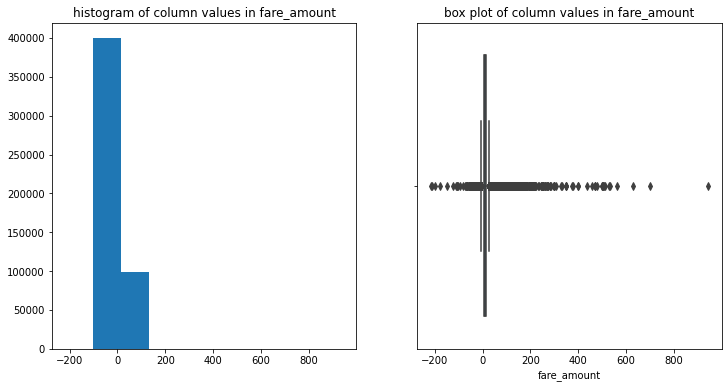

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


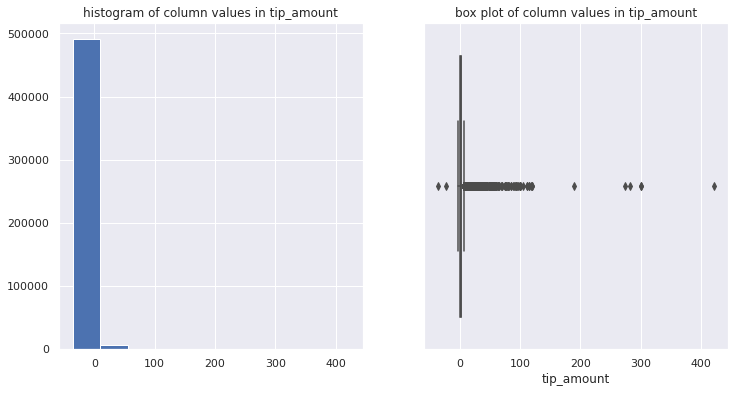

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


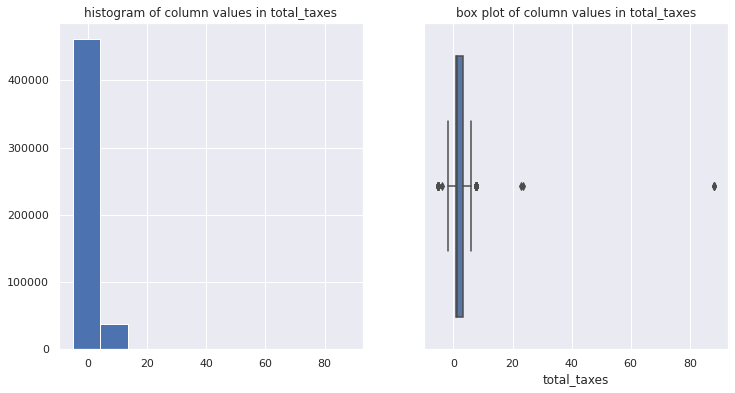

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


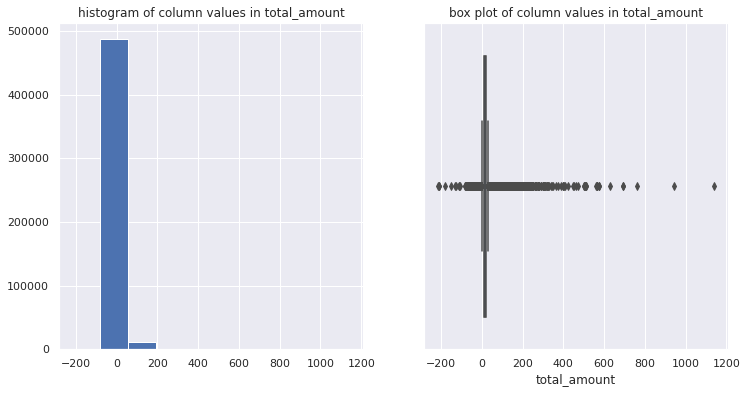

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


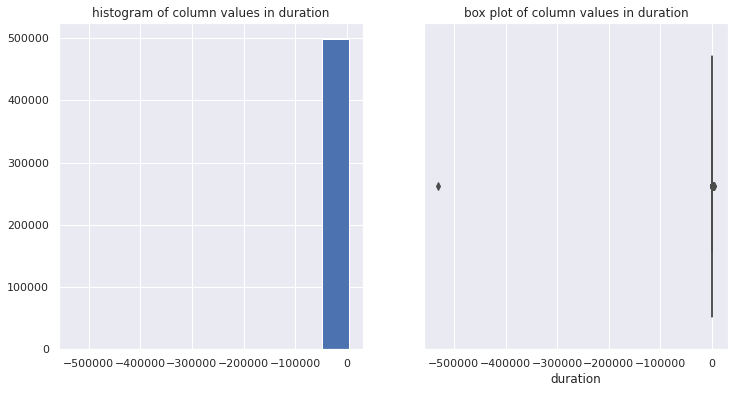

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


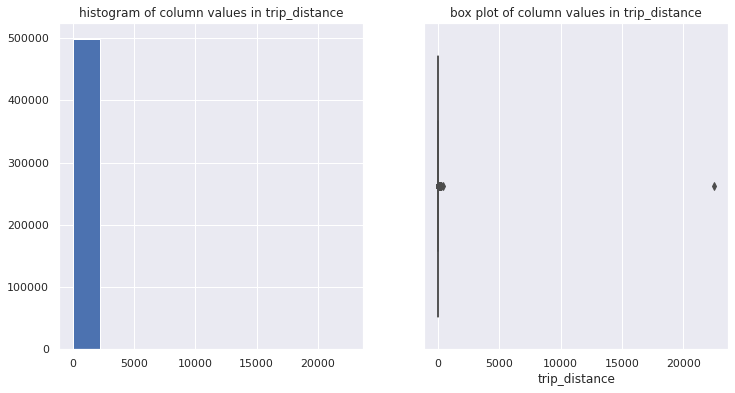

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


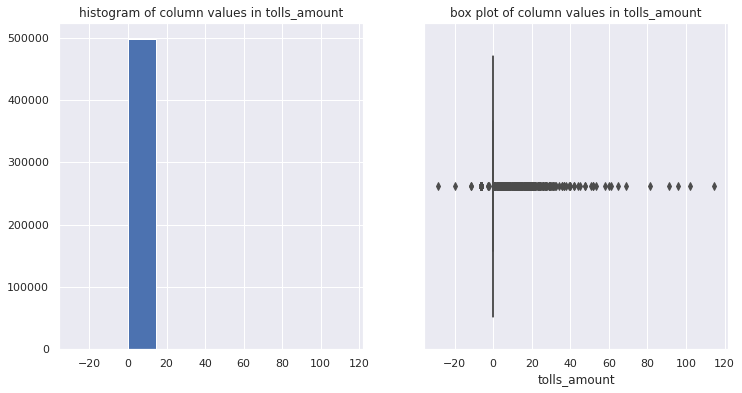

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(trip_data[feature])
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(trip_data[feature],ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

Negtive values for columns does not make sense fare_amount tip_amount total_taxes tolls_amount total_amount duration

Let's just observe how the negative values in each of these columns look like

In [ ]:
# using .loc to show negative values in fare_amount  # 8 mil rows
trip_data.loc[trip_data['fare_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
14,2020-06-01 00:21:28,2020-06-01 00:25:01,1,1.11,100,249,Dispute,-5.5,0.0,0.0,-9.3,3.550000,0,0,Monday,-1.3
103,2020-06-01 00:41:37,2020-06-01 00:41:54,1,0.00,186,186,No_charge,-2.0,0.0,0.0,-4.8,0.283333,0,0,Monday,-0.3
157,2020-06-01 01:56:10,2020-06-01 02:12:36,1,1.61,260,7,Dispute,-12.5,0.0,0.0,-13.8,16.433333,1,2,Monday,-1.3
167,2020-06-01 01:46:11,2020-06-01 02:06:21,1,2.62,95,160,Dispute,-13.5,0.0,0.0,-14.8,20.166667,1,2,Monday,-1.3
169,2020-06-01 01:48:54,2020-06-01 01:49:08,1,0.04,246,246,No_charge,-2.5,0.0,0.0,-6.3,0.233333,1,1,Monday,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496584,2020-06-30 19:55:21,2020-06-30 20:02:14,2,1.70,100,170,Dispute,-6.5,0.0,0.0,-10.8,6.883333,19,20,Tuesday,-1.8
497216,2020-06-30 20:04:44,2020-06-30 20:04:46,2,0.00,262,264,No_charge,-2.5,0.0,0.0,-3.8,0.033333,20,20,Tuesday,-1.3
497574,2020-06-30 21:11:21,2020-06-30 21:12:12,1,0.03,41,41,Dispute,-2.5,0.0,0.0,-3.8,0.850000,21,21,Tuesday,-1.3
498020,2020-06-30 21:56:04,2020-06-30 21:56:23,2,0.06,164,186,Dispute,-2.5,0.0,0.0,-6.3,0.316667,21,21,Tuesday,-1.3


In [ ]:
# using .loc to show negative values in tip_amount
trip_data.loc[trip_data['tip_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
4969,2020-06-01 12:34:24,2020-06-01 12:34:46,1,0.00,193,193,Dispute,-2.5,-0.01,0.0,-3.31,0.366667,12,12,Monday,-0.8
29627,2020-06-03 10:19:57,2020-06-03 10:20:14,1,0.00,193,193,No_charge,-2.5,-0.82,0.0,-4.12,0.283333,10,10,Wednesday,-0.8
31382,2020-06-03 12:34:51,2020-06-03 12:35:16,1,0.00,193,193,Dispute,-2.5,-0.01,0.0,-3.31,0.416667,12,12,Wednesday,-0.8
69396,2020-06-06 09:22:35,2020-06-06 09:22:41,1,0.00,193,193,No_charge,-2.5,-0.06,0.0,-3.36,0.100000,9,9,Saturday,-0.8
250800,2020-06-18 12:49:41,2020-06-18 12:51:54,1,0.00,7,7,No_charge,-3.5,-1.08,0.0,-5.38,2.216667,12,12,Thursday,-0.8
261586,2020-06-18 21:07:58,2020-06-18 21:28:00,1,4.07,239,137,Dispute,-17.0,-22.00,0.0,-42.80,20.033333,21,21,Thursday,-1.3
266861,2020-06-19 10:02:36,2020-06-19 10:25:54,1,10.59,231,223,Credit_card,-31.0,-36.30,0.0,-70.60,23.300000,10,10,Friday,-0.8
267171,2020-06-19 10:49:38,2020-06-19 10:49:45,2,0.00,193,264,No_charge,-2.5,-0.66,0.0,-3.96,0.116667,10,10,Friday,-0.8
287651,2020-06-20 12:00:05,2020-06-20 12:00:17,1,0.00,193,193,No_charge,-2.5,-0.66,0.0,-3.96,0.200000,12,12,Saturday,-0.8
289530,2020-06-20 14:55:08,2020-06-20 14:55:43,1,0.00,193,193,No_charge,-2.5,-0.01,0.0,-3.31,0.583333,14,14,Saturday,-0.8


In [ ]:
# using .loc to show negative values in tolls_amount
trip_data.loc[trip_data['tolls_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
26633,2020-06-03 01:01:05,2020-06-03 01:21:12,1,9.78,170,197,Dispute,-28.5,0.00,-6.12,-38.42,20.116667,1,1,Wednesday,-1.3
50519,2020-06-04 17:45:16,2020-06-04 17:57:23,1,3.02,170,112,Cash,-11.5,0.00,-6.12,-21.92,12.116667,17,17,Thursday,-1.8
57050,2020-06-05 10:53:22,2020-06-05 11:18:36,1,11.55,230,121,Dispute,-35.0,0.00,-6.12,-44.42,25.233333,10,11,Friday,-0.8
58141,2020-06-05 11:17:46,2020-06-05 11:46:03,1,19.58,48,1,Cash,-53.0,0.00,-28.75,-85.05,28.283333,11,11,Friday,-0.8
61204,2020-06-05 14:34:36,2020-06-05 14:49:27,1,9.82,138,235,No_charge,-27.5,0.00,-6.12,-34.42,14.850000,14,14,Friday,-0.8
67111,2020-06-05 20:12:07,2020-06-05 20:44:02,1,16.06,236,123,Dispute,-45.0,0.00,-6.12,-54.92,31.916667,20,20,Friday,-1.3
76709,2020-06-06 19:34:15,2020-06-06 20:07:45,1,15.47,151,131,Dispute,-45.5,0.00,-6.12,-52.42,33.500000,19,20,Saturday,-0.8
92473,2020-06-08 11:28:59,2020-06-08 11:57:17,1,12.87,138,32,Dispute,-37.0,0.00,-6.12,-43.92,28.300000,11,11,Monday,-0.8
114260,2020-06-09 16:01:43,2020-06-09 16:33:58,1,5.68,152,193,No_charge,-25.5,0.00,-6.12,-33.42,32.250000,16,16,Tuesday,-1.8
118430,2020-06-09 22:14:44,2020-06-09 22:51:44,4,16.51,24,10,Dispute,-48.0,0.00,-6.12,-55.42,37.000000,22,22,Tuesday,-1.3


In [ ]:
# using .loc to show negative values in total_taxes
trip_data.loc[trip_data['total_taxes']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
14,2020-06-01 00:21:28,2020-06-01 00:25:01,1,1.11,100,249,Dispute,-5.5,0.0,0.0,-9.3,3.550000,0,0,Monday,-1.3
103,2020-06-01 00:41:37,2020-06-01 00:41:54,1,0.00,186,186,No_charge,-2.0,0.0,0.0,-4.8,0.283333,0,0,Monday,-0.3
157,2020-06-01 01:56:10,2020-06-01 02:12:36,1,1.61,260,7,Dispute,-12.5,0.0,0.0,-13.8,16.433333,1,2,Monday,-1.3
167,2020-06-01 01:46:11,2020-06-01 02:06:21,1,2.62,95,160,Dispute,-13.5,0.0,0.0,-14.8,20.166667,1,2,Monday,-1.3
169,2020-06-01 01:48:54,2020-06-01 01:49:08,1,0.04,246,246,No_charge,-2.5,0.0,0.0,-6.3,0.233333,1,1,Monday,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496584,2020-06-30 19:55:21,2020-06-30 20:02:14,2,1.70,100,170,Dispute,-6.5,0.0,0.0,-10.8,6.883333,19,20,Tuesday,-1.8
497216,2020-06-30 20:04:44,2020-06-30 20:04:46,2,0.00,262,264,No_charge,-2.5,0.0,0.0,-3.8,0.033333,20,20,Tuesday,-1.3
497574,2020-06-30 21:11:21,2020-06-30 21:12:12,1,0.03,41,41,Dispute,-2.5,0.0,0.0,-3.8,0.850000,21,21,Tuesday,-1.3
498020,2020-06-30 21:56:04,2020-06-30 21:56:23,2,0.06,164,186,Dispute,-2.5,0.0,0.0,-6.3,0.316667,21,21,Tuesday,-1.3


In [ ]:
# using .loc to show negative values in total_amount
trip_data.loc[trip_data['total_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
14,2020-06-01 00:21:28,2020-06-01 00:25:01,1,1.11,100,249,Dispute,-5.5,0.0,0.0,-9.3,3.550000,0,0,Monday,-1.3
103,2020-06-01 00:41:37,2020-06-01 00:41:54,1,0.00,186,186,No_charge,-2.0,0.0,0.0,-4.8,0.283333,0,0,Monday,-0.3
157,2020-06-01 01:56:10,2020-06-01 02:12:36,1,1.61,260,7,Dispute,-12.5,0.0,0.0,-13.8,16.433333,1,2,Monday,-1.3
167,2020-06-01 01:46:11,2020-06-01 02:06:21,1,2.62,95,160,Dispute,-13.5,0.0,0.0,-14.8,20.166667,1,2,Monday,-1.3
169,2020-06-01 01:48:54,2020-06-01 01:49:08,1,0.04,246,246,No_charge,-2.5,0.0,0.0,-6.3,0.233333,1,1,Monday,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496584,2020-06-30 19:55:21,2020-06-30 20:02:14,2,1.70,100,170,Dispute,-6.5,0.0,0.0,-10.8,6.883333,19,20,Tuesday,-1.8
497216,2020-06-30 20:04:44,2020-06-30 20:04:46,2,0.00,262,264,No_charge,-2.5,0.0,0.0,-3.8,0.033333,20,20,Tuesday,-1.3
497574,2020-06-30 21:11:21,2020-06-30 21:12:12,1,0.03,41,41,Dispute,-2.5,0.0,0.0,-3.8,0.850000,21,21,Tuesday,-1.3
498020,2020-06-30 21:56:04,2020-06-30 21:56:23,2,0.06,164,186,Dispute,-2.5,0.0,0.0,-6.3,0.316667,21,21,Tuesday,-1.3


In [ ]:
# data shape before filtering negative fare_amount rows
print(trip_data.shape)
# using .loc to filter only those rows where fare_amount is positive 
trip_data = trip_data.loc[trip_data['fare_amount']>=0]
# print data shape
print(trip_data.shape)
# print data.head()
trip_data.head()

(499079, 16)
(496572, 16)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
0,2020-06-01 00:31:23,2020-06-01 00:49:58,1,3.6,140,68,Credit_card,15.5,4.00,0.0,23.30,18.583333,0,0,Monday,3.8
1,2020-06-01 00:42:50,2020-06-01 01:04:33,1,5.6,79,226,Credit_card,19.5,2.00,0.0,25.30,21.716667,0,1,Monday,3.8
2,2020-06-01 00:39:51,2020-06-01 00:49:09,1,2.3,238,116,Cash,10.0,0.00,0.0,11.30,9.300000,0,0,Monday,1.3
3,2020-06-01 00:56:13,2020-06-01 01:11:38,1,5.3,141,116,Cash,17.5,0.00,0.0,21.30,15.416667,0,1,Monday,3.8
4,2020-06-01 00:16:41,2020-06-01 00:29:30,1,4.4,186,75,Credit_card,14.5,3.65,0.0,21.95,12.816667,0,0,Monday,3.8


In [ ]:
print(trip_data.loc[trip_data['tip_amount']<0].shape)
print(trip_data.loc[trip_data['total_taxes']<0].shape)
print(trip_data.loc[trip_data['tolls_amount']<0].shape)

(0, 16)
(0, 16)
(0, 16)


In [ ]:
# using .loc to show negative values in duration
trip_data.loc[trip_data['duration']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_taxes
182436,2020-06-14 04:09:09,2019-06-11 06:17:55,1,8.1,262,138,Credit_card,26.0,7.18,6.12,43.1,-531231.233333,4,6,Sunday,3.8


In [ ]:
# using .loc to filter only those rows where duration is positive 
trip_data = trip_data.loc[trip_data['duration']>=0]
print(trip_data.shape)

(496571, 16)


Now we will again look at the distribution plots for these variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


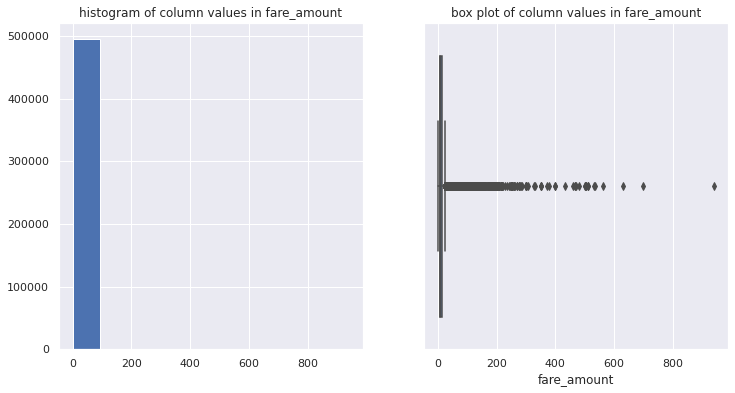

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


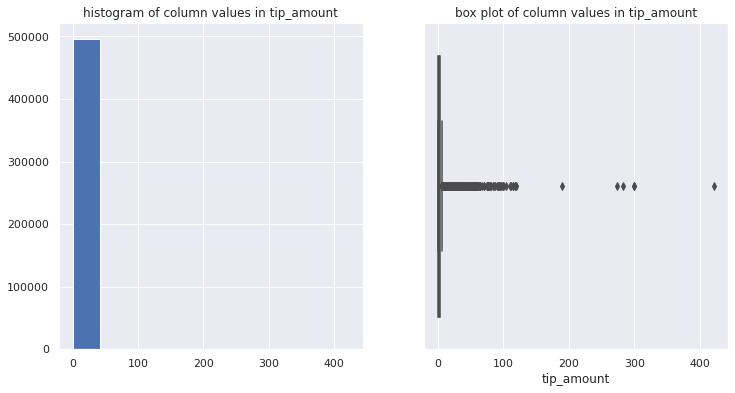

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


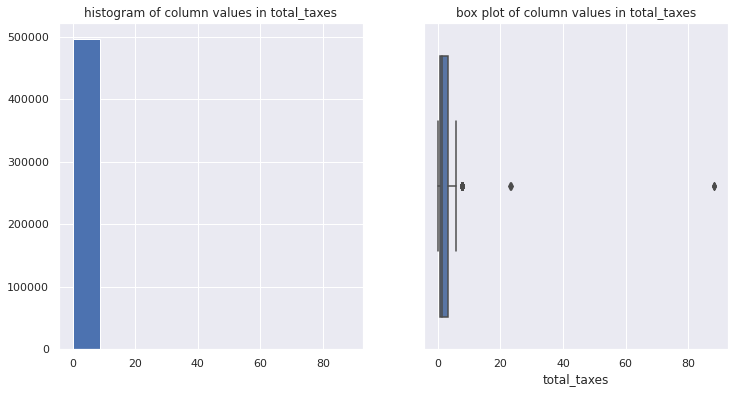

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


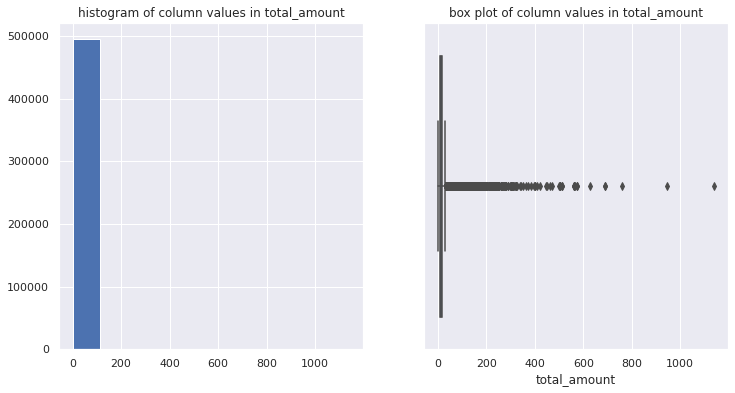

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


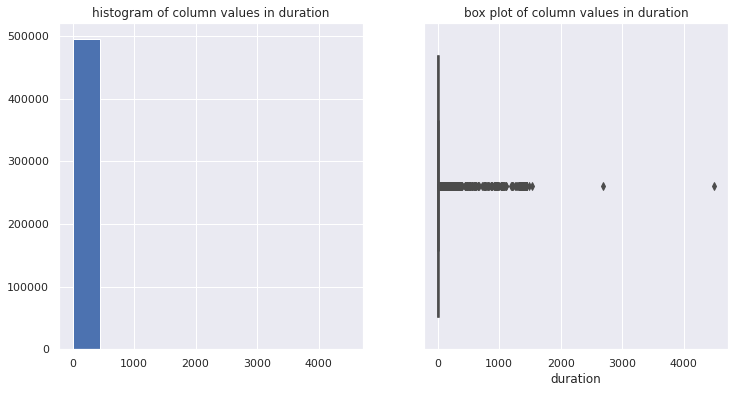

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


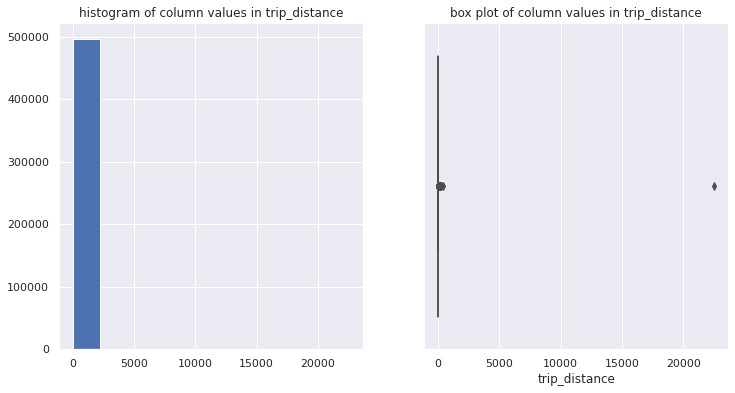

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


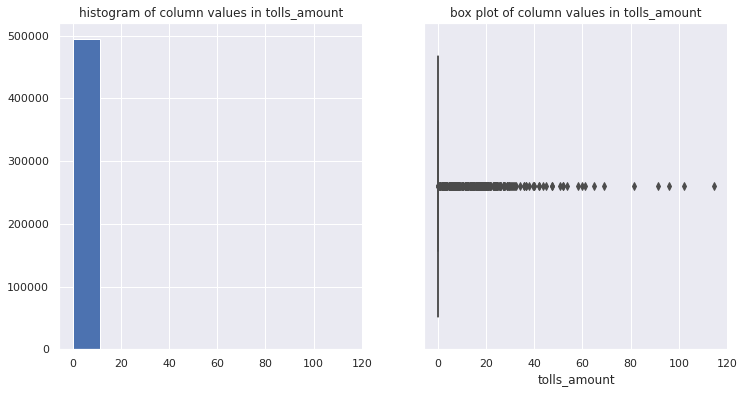

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(trip_data[feature])
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(trip_data[feature],ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

In [ ]:
# use .describe() again to show the statistics for these continuous variables
trip_data[continuous_columns].describe()

,fare_amount,tip_amount,total_taxes,total_amount,duration,trip_distance,tolls_amount
count,496571.000000,496571.000000,496571.000000,496571.000000,496571.000000,496571.000000,496571.000000
mean,11.961704,1.781660,1.928412,17.186914,13.609472,2.869122,0.222927
std,11.302666,2.698523,1.283562,13.226619,56.378312,32.198804,1.369394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.800000,10.350000,5.316667,1.000000,0.000000
50%,8.500000,1.500000,1.300000,13.560000,8.833333,1.710000,0.000000
75%,13.500000,2.660000,3.300000,18.960000,14.333333,3.150000,0.000000
max,941.500000,422.680000,88.360000,1141.100000,4497.566667,22543.990000,114.750000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


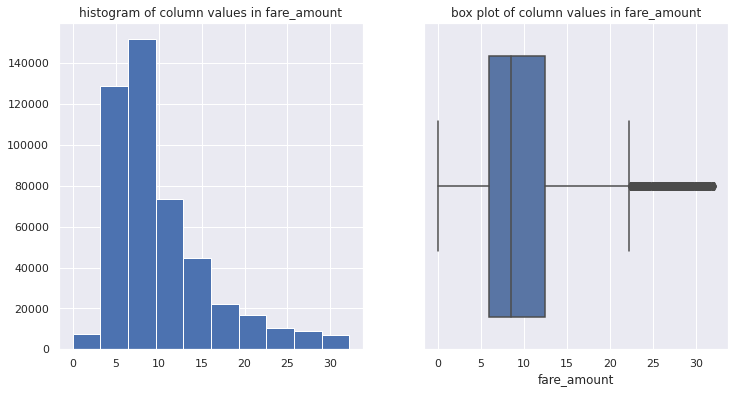

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


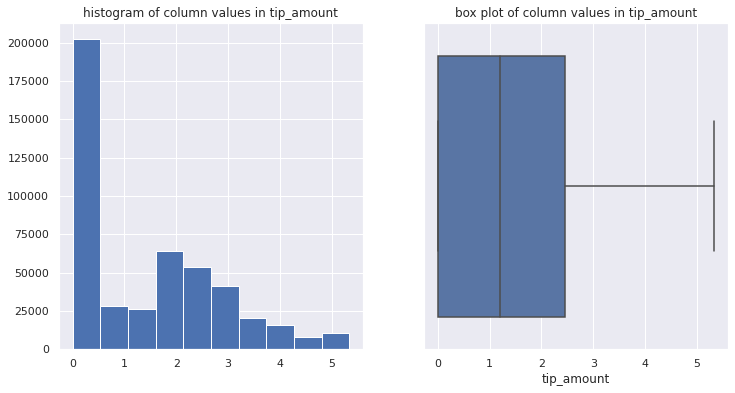

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


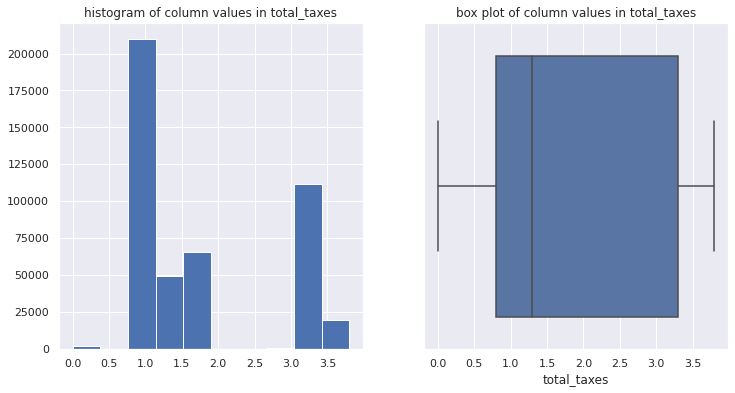

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


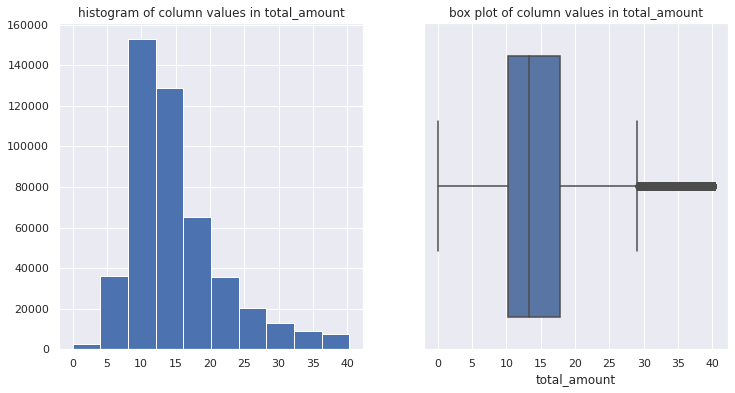

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


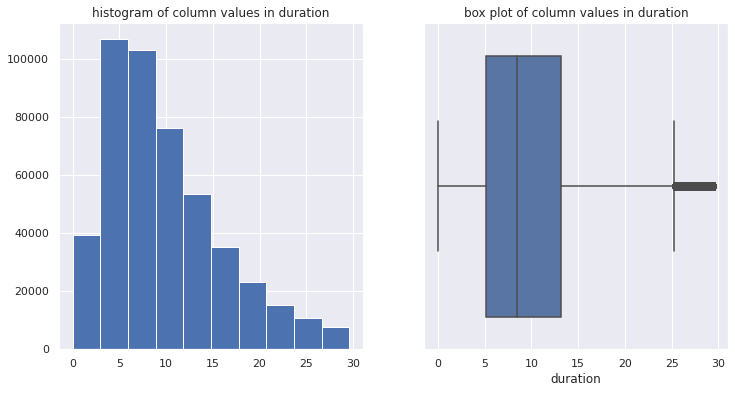

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


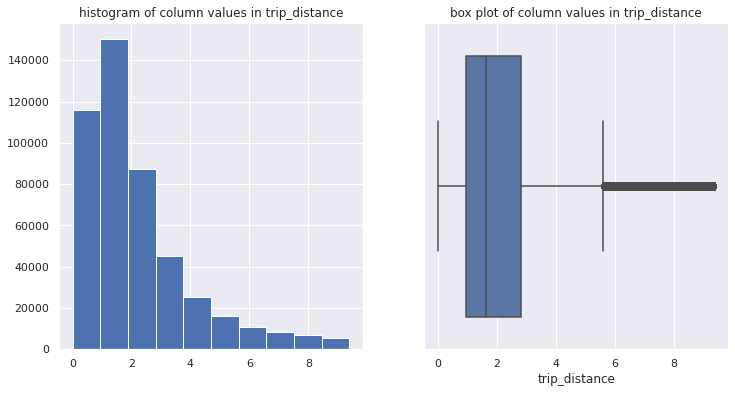

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


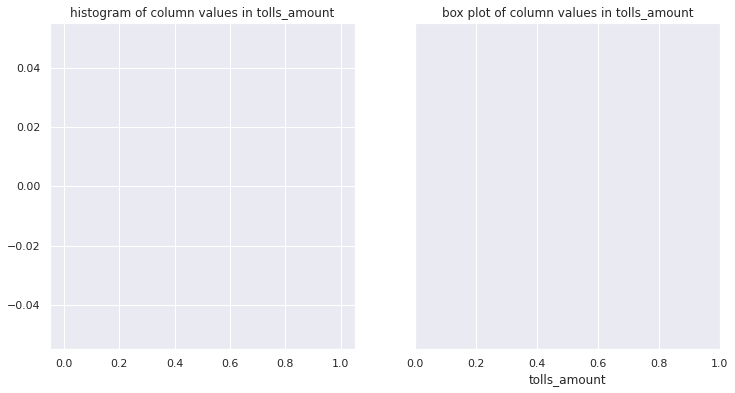

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    # removing the outliers
    feature_data_percentile = trip_data[feature].quantile(0.95)
    feature_data = trip_data.loc[trip_data[feature]<feature_data_percentile,feature]
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(feature_data)
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(feature_data,ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

Looking from the above histograms and box plots we can decipher following information for each column

fare_amount - most of the fare amount is within 8.5 dollar value as is shown by the median value. Though there are some significant outliers, the maximum of which is beyond 940 dollars.

tip_amount - most of the tip amount is within 1.5 dollar as is shown by the median value. Though again here too we have outliers, the maximum of which is around 400 dollars.

tolls_amount - most of the tolls_amount value is 0 so it seems most of the trips do not have to pay for tolls.

total_taxes - most of the total_taxes values is within 1.3 dollars as is shown by the median value. There is very less outliers.

total_amount - most of the total_amount values is within 14 dollars as is shown by the median value. Again the outliers in this case seems mostly because of outliers in fare_amount.some Heavy outlier exist of 1100 dollar

duration - most of the values in duration is within 8.86 minutes range as is shown by the median value. We do have some outliers which are beyond the range of 4000 minutes.

trip_distance - most of the trip_distance is within 1.7 miles value as is shown by the median. only a heavy outliers exit of around 22k miles.

**categorical_variables**

In [ ]:
# list of categorical_variables
categorical_variables = ['payment_type','trip_pickup_hour','trip_dropoff_hour','trip_day','PULocationID','DOLocationID']

In [ ]:
# start exploration with payment_type using .value_counts()
trip_data['payment_type'].value_counts()

Credit_card    322579
Cash           168391
No_charge        4476
Dispute          1113
Unknown            12
Name: payment_type, dtype: int64

In [ ]:
# but this is a series for ease of plotting we need to use dataframe using .reset_index() on value_counts()
payment_type_category_count = trip_data['payment_type'].value_counts().reset_index()
# print the above dataframe
payment_type_category_count

,index,payment_type
0,Credit_card,322579
1,Cash,168391
2,No_charge,4476
3,Dispute,1113
4,Unknown,12


In [ ]:
# we are shown the count under each category but it is better to have count% for comparison - create count_percent col
payment_type_category_count['count_percent'] = (payment_type_category_count['payment_type']/trip_data.shape[0])*100
# print the data frame
payment_type_category_count

,index,payment_type,count_percent
0,Credit_card,322579,64.961305
1,Cash,168391,33.910760
2,No_charge,4476,0.901382
3,Dispute,1113,0.224137
4,Unknown,12,0.002417


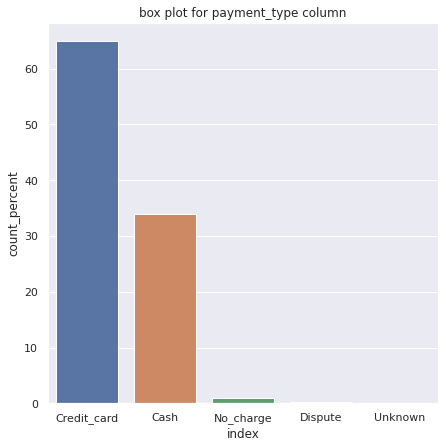

In [ ]:
# now let's plot it as bar chart
# first step - create fig, ax object using plt.subplots
fig,ax = plt.subplots(figsize=(7,7))
# second step - use sns.barplot(x, y , data, ax) for plotting bar plot
sns.barplot(x = 'index', y = 'count_percent', data=payment_type_category_count,ax=ax)
# third step - use ax object to change plot properties - here we set a title with ax.set_title()
ax.set_title('box plot for payment_type column')
# third step - seaborn style setting
sns.set()
# fourth step - use plt.show() for showing the plots
plt.show()

From above we can understand that most of the payments are done through cash and credit cards. The proportion of credit card payments is around 70%.

Now we look into time based categorical variables.

'trip_pickup_hour' 'trip_dropoff_hour' 'trip_day'

Number of categories in feature trip_pickup_hour is 24


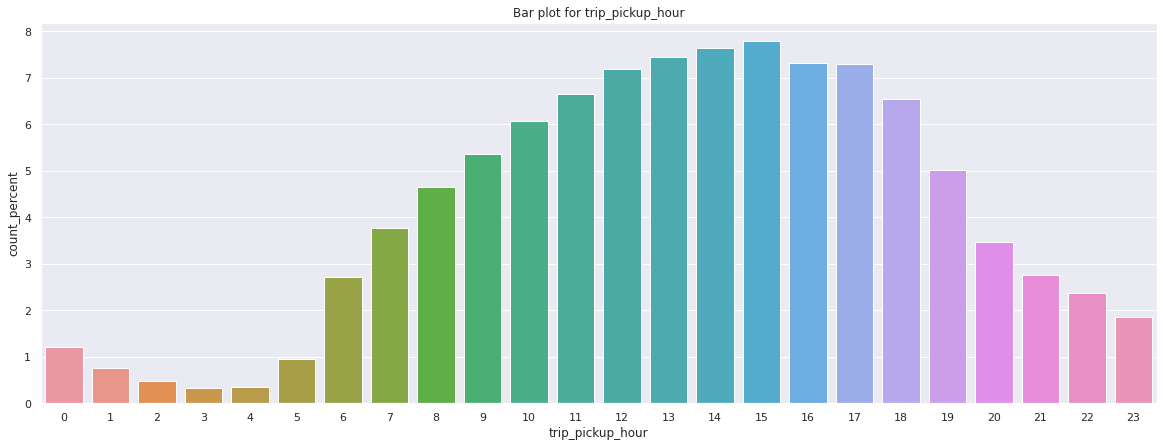

Number of categories in feature trip_dropoff_hour is 24


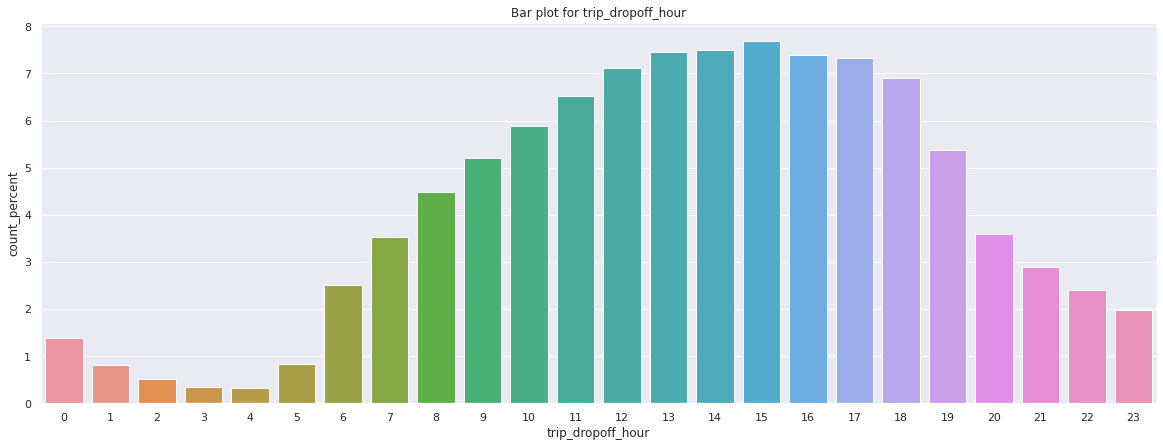

Number of categories in feature trip_day is 7


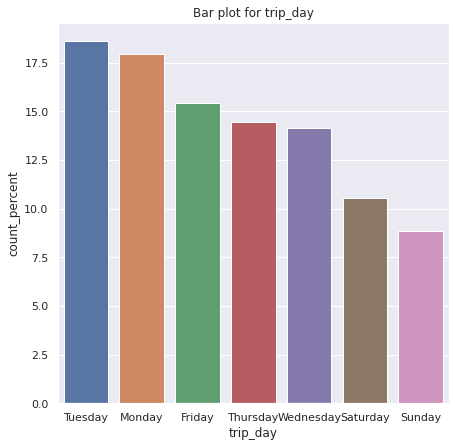

In [ ]:
# now let's plot all the time based categorical variables in this way using a for loop
for feature in ['trip_pickup_hour','trip_dropoff_hour','trip_day']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature '+ feature + ' is ' + str(feature_value_counts.shape[0]))
    # Create fig,ax object using plt.subplots 
    if feature_value_counts.shape[0]<10:
        fig,ax = plt.subplots(figsize=(7,7))
    else:
        fig,ax = plt.subplots(figsize=(20,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    # set_title
    ax.set_title('Bar plot for '+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

Based on above plots we can observe following things

Trip Hour 1) The dropoff and pick up hour distribution looks almost same, it is because the trip duration in most of the cases is less than an hour with the median duration value within 9 min.

2) Peak hour for the pick up and drop off is around evening from 13 to 16. The busiest time is 15 PM.

3) There is less traffic during night times and only after 8AM in morning does the pickup and drop off starts picking up pace.

Trip day

1)Sunday has the lowest taxi uses while Tuesday is the busiest.

2)Weekdays have heavy taxi uses compared to the weekands

Moving on we will explore the distribution of location based features:

'PULocationID'

'DOLocationID'

In [ ]:
# let's see the number of categories available in both pickup and dropoff location - PULocationID and DOLocationID
print(trip_data['PULocationID'].value_counts().shape)
print(trip_data['DOLocationID'].value_counts().shape)

(252,)
(259,)


Number of categories in feature PULocationID is 252


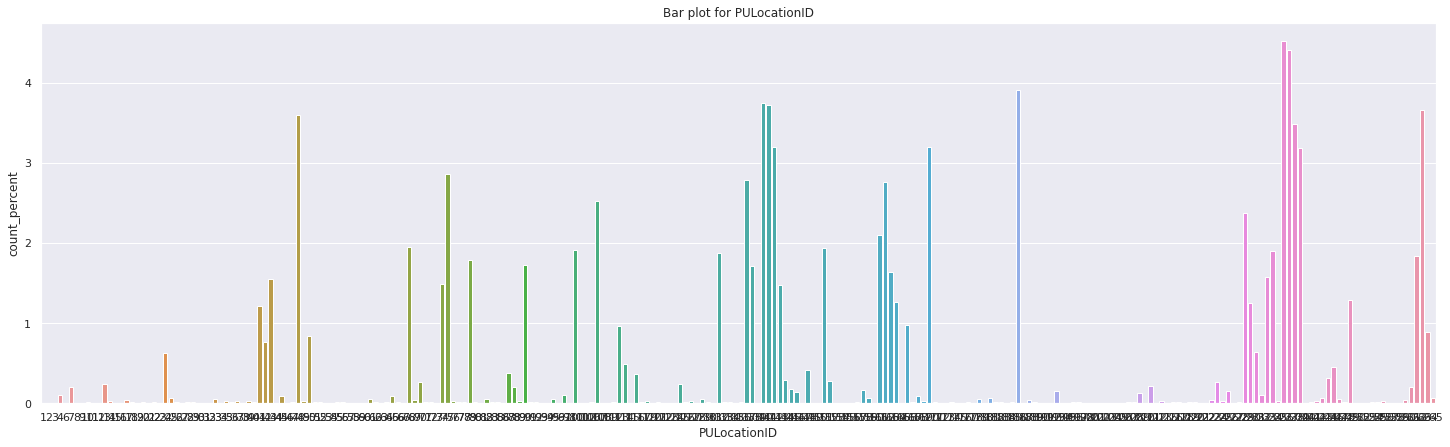

Number of categories in feature DOLocationID is 259


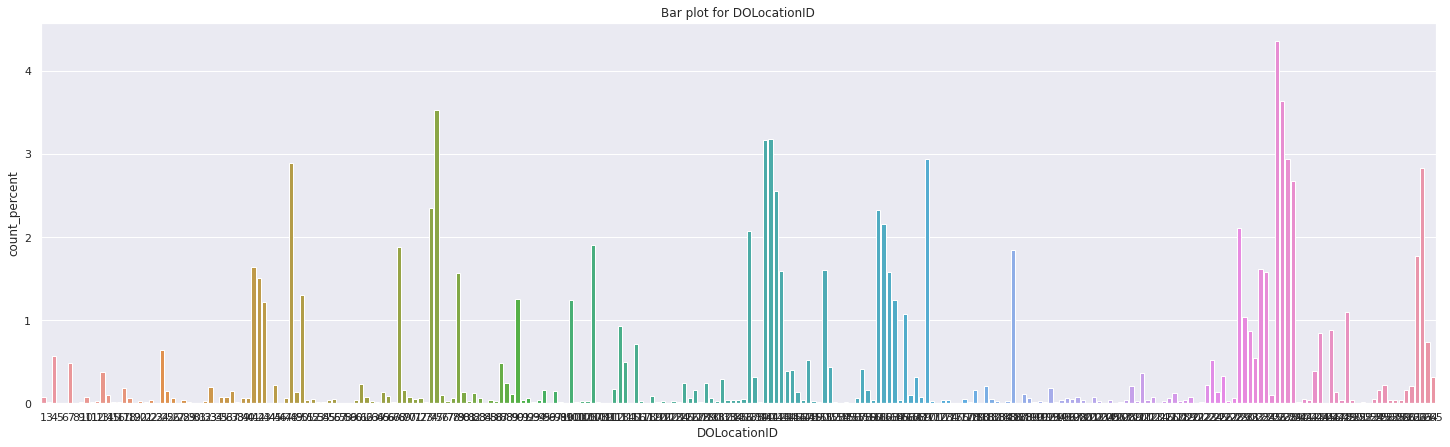

In [ ]:
for feature in ['PULocationID','DOLocationID']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature '+ feature + ' is ' + str(feature_value_counts.shape[0]))
    # Create fig,ax object using plt.subplots 
    fig,ax = plt.subplots(figsize=(25,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    # set_title
    ax.set_title('Bar plot for '+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

The above plots looks quite messy but one insight that we can indetify from above plot that most of pickup and dropoff points do not have more 0.5% traffic (0.5 percent of 8755612 total trips is 43778).

So in our next plot we will filter out these pickup and dropoff points to look into the graph more clearly.

Number of categories in feature PULocationID above 0.5 % count is 42


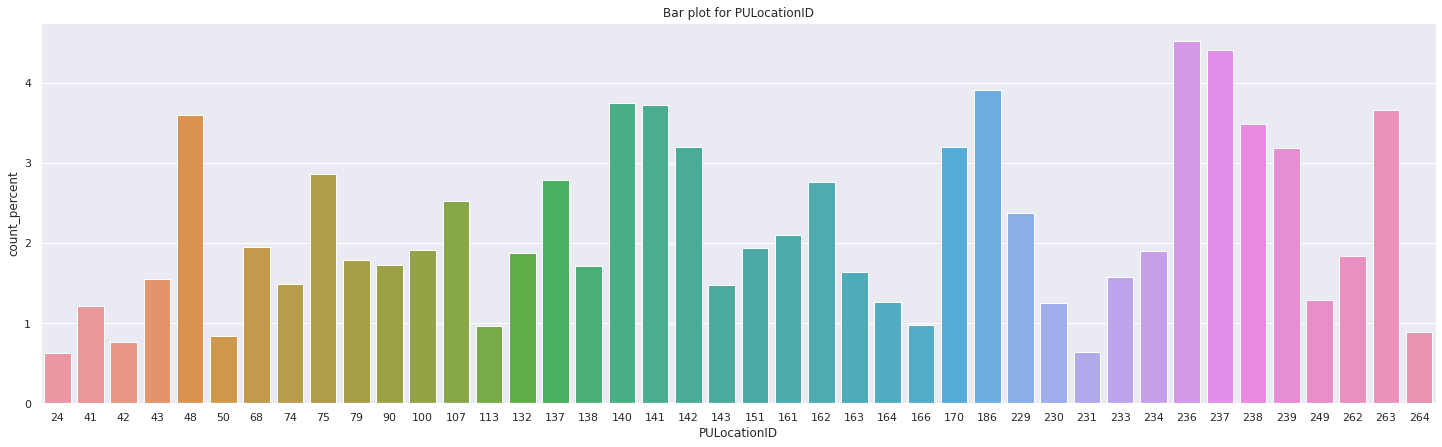

Number of categories in feature DOLocationID above 0.5 % count is 47


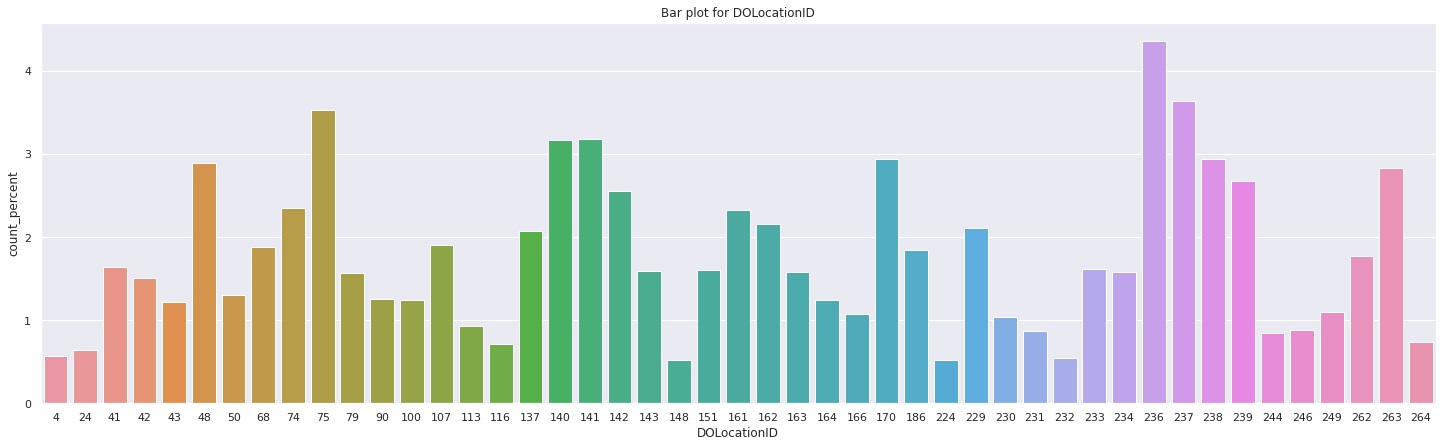

In [ ]:
for feature in ['PULocationID','DOLocationID']:
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # filter only those location which has more than 0.5 % of traffic
    feature_value_counts = feature_value_counts.loc[feature_value_counts['count_percent']>=0.5]
    print('Number of categories in feature '+ feature + ' above 0.5 % count is ' + str(feature_value_counts.shape[0]))
    fig,ax = plt.subplots(figsize=(25,7))
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    ax.set_title('Bar plot for '+ feature)
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

From the above plots we can glance following insights

The busiest location in terms of pickup are 236 and 237

The busiest location for dropoff too are 236 , 237 and 79 busiest locations but 236 is far more busiest than the other two in drop_off hour. 

For exploring busy routes we need to create a new route column which is a combination of pickup and dropoff point.

So route = 'PULocationID'-'DULocationID'

In [ ]:
# create routes column using PULocationID and DOLocationID with lambda function
trip_data['routes'] = trip_data.apply(lambda x: str(x['PULocationID'])+'-'+str(x['DOLocationID']),axis=1)

In [ ]:
trip_data['routes'].head()

0     140-68
1     79-226
2    238-116
3    141-116
4     186-75
Name: routes, dtype: object

Number of categories in feature routes above 0.25 % count is 23


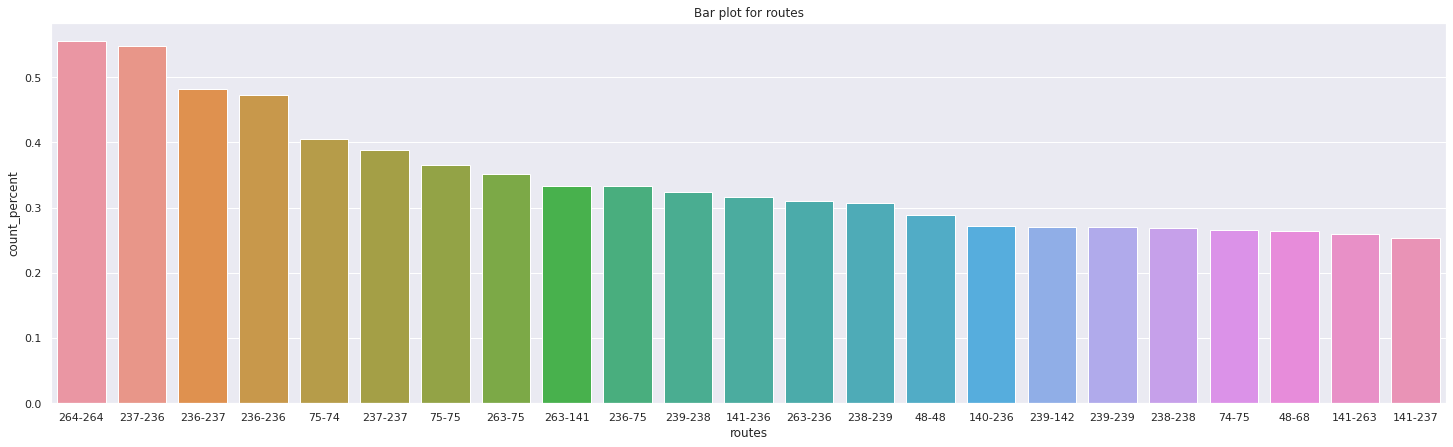

In [ ]:
# plot bar plot for routes which have trip count above 0.25%
feature = 'routes'
feature_value_counts = trip_data[feature].value_counts().reset_index()
feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
# choosing routes where the trip percent is above 0.25% of total trips
feature_value_counts = feature_value_counts.loc[feature_value_counts['count_percent']>=0.25]
print('Number of categories in feature '+ feature + ' above 0.25 % count is ' + str(feature_value_counts.shape[0]))
fig,ax = plt.subplots(figsize=(25,7))
sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
ax.set_title('Bar plot for '+ feature)
ax.set_xlabel(feature)
sns.set()
plt.show()

From the above plot we can observe that 5 busiest route are following:

264-264

237-236

236-237

236-236

In [ ]:
# look into value_counts of 'passenger_count'
trip_data['passenger_count'].value_counts()

1    386903
2     56951
3     14257
0     13303
5     11187
6      9045
4      4922
9         2
8         1
Name: passenger_count, dtype: int64

Here we see that the mostly 1 or 2 passengers avail the cab. The instance of large group of people travelling together is rare

# Bivariate Analysis

PRICING VARIABLE EXPLORATION WITH HOUR/DAY OF TRIP *

All of our pricing variables are continuous and Hour/Day is categorical.

The way to explore relationship between a continuous variable and categorical variable is through a box plot. We create box plot for each category of categorical variable.

so as to see how the distribution changes for the continuous variables as the category values changes for categorical variable.

We will start with fare_amount exploration.

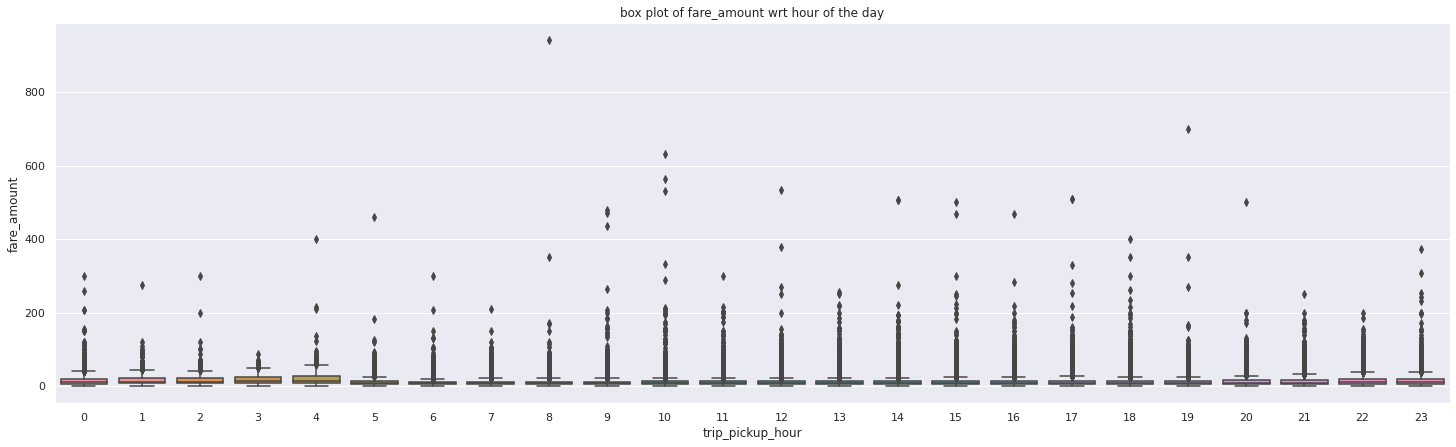

In [ ]:
# fig,ax object using plt.subplots()
fig,ax = plt.subplots(figsize=(25,7))
# box plot using - sns.boxplot(x, y , data, ax)
sns.boxplot(x = 'trip_pickup_hour',y='fare_amount',data=trip_data,ax=ax)
# ax.set_title
ax.set_title('box plot of fare_amount wrt hour of the day')
# seaborn style setting
sns.set()
# matplotlib plt.show()
plt.show()

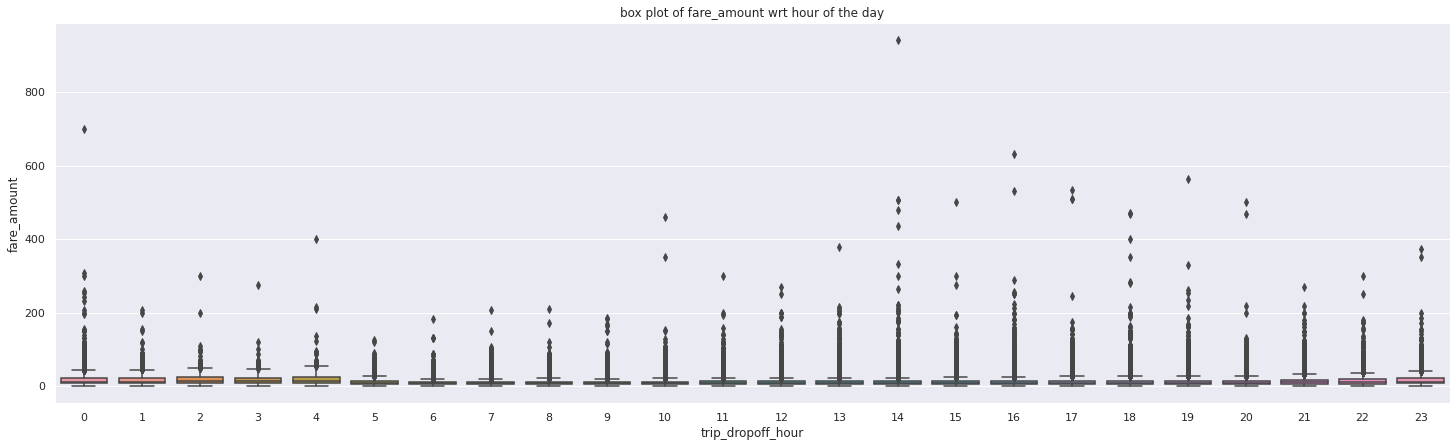

In [ ]:
# fig,ax object using plt.subplots()
fig,ax = plt.subplots(figsize=(25,7))
# box plot using - sns.boxplot(x, y , data, ax)
sns.boxplot(x = 'trip_dropoff_hour',y='fare_amount',data=trip_data,ax=ax)
# ax.set_title
ax.set_title('box plot of fare_amount wrt hour of the day')
# seaborn style setting
sns.set()
# matplotlib plt.show()
plt.show()

From the above plot we can observe that most of the outliers in fare_amount happens during 10AM to 7PM based on pickup time.

From the above plot trip_dropoff_hour outliers happens during 14 or 2PM to 20 or 8PM based on pickup time.

Outliers is less in the late nights and early morning.

For observing the distribution in a better way we would restrict the fare_amount to below 50 dollars.

In [ ]:
# restricted_fare_amount_data dataframe formation by filtering fare_amount less than 50 dollars
restricted_fare_amount_data = trip_data.loc[(trip_data['fare_amount']<=50) & (trip_data['fare_amount']>=0)]
restricted_fare_amount_data.shape

(487000, 17)

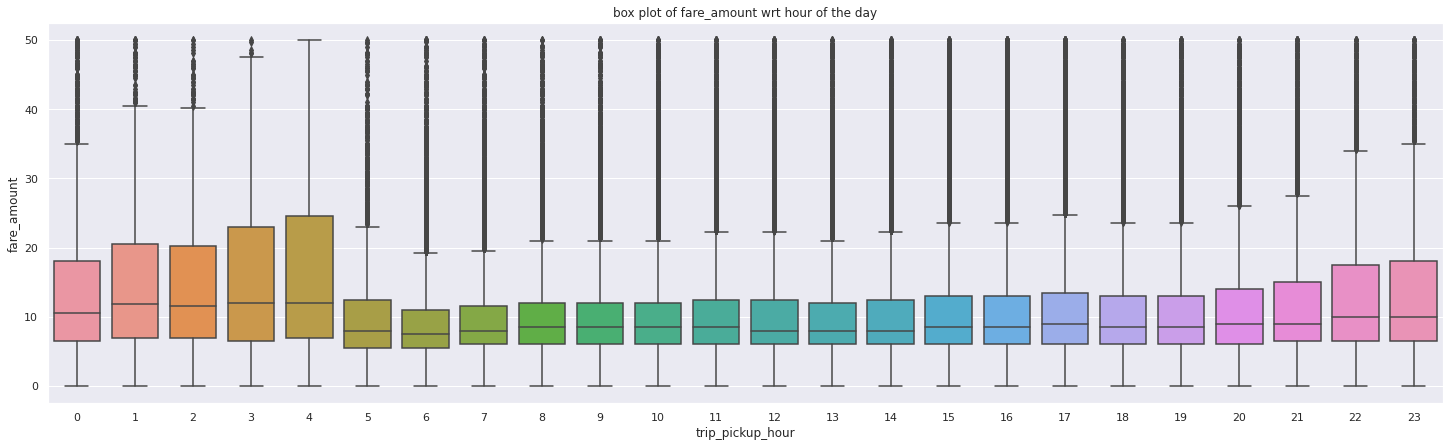

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day')
sns.set()
plt.show()

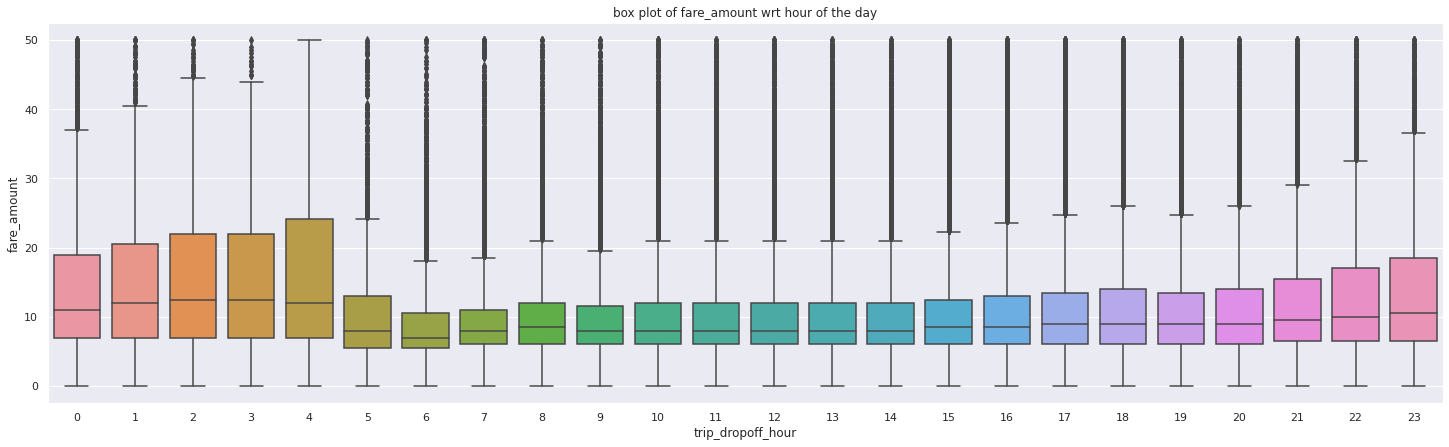

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day')
sns.set()
plt.show()

We can obseve from the above graph the fare_amount in late nigth is comparitively higher than the rest of the hours(same pattern seen in both the cases).

Also the median fare_amount between 5 - 6 is less than all others hours of the day(seen in bothe cases)

let's us see if hour of day has any effect on other pricing related variables or not.

Starting with total_amount

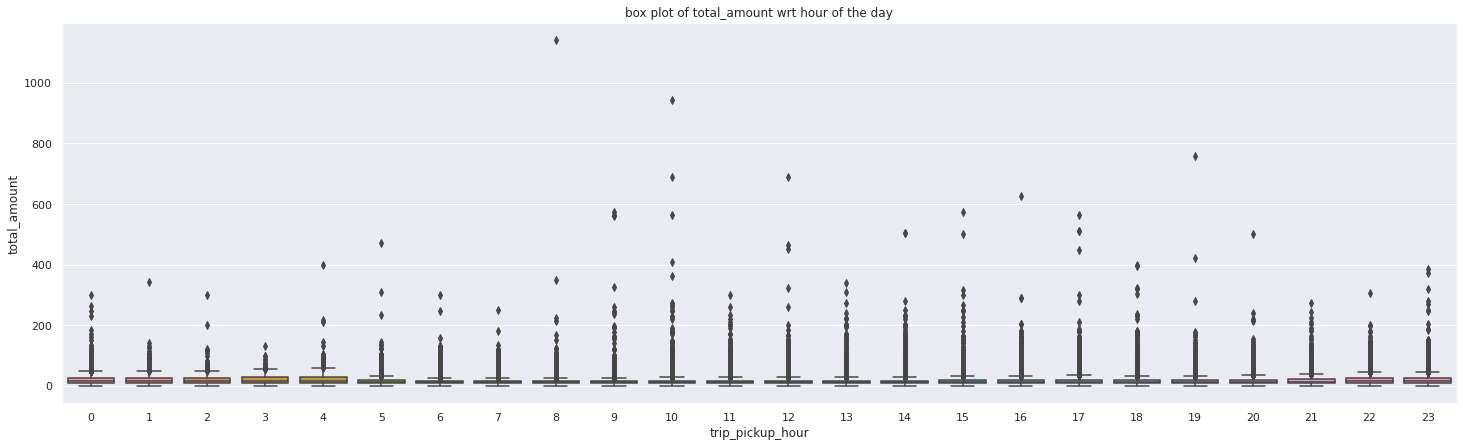

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
# sns.boxplot changes
sns.boxplot(x = 'trip_pickup_hour',y='total_amount',data=trip_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

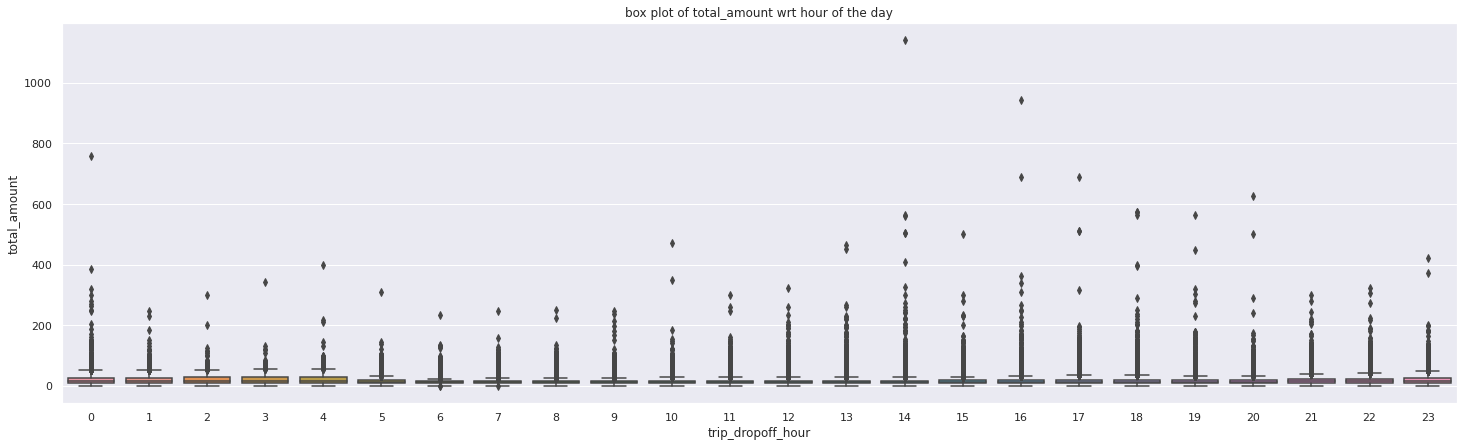

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
# sns.boxplot changes
sns.boxplot(x = 'trip_dropoff_hour',y='total_amount',data=trip_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

In [ ]:
# restricted_total_amount_data for filtering total_amount data to less than 50 dollars
restricted_total_amount_data = trip_data.loc[trip_data['total_amount']<=50]
restricted_total_amount_data.shape

(482489, 17)

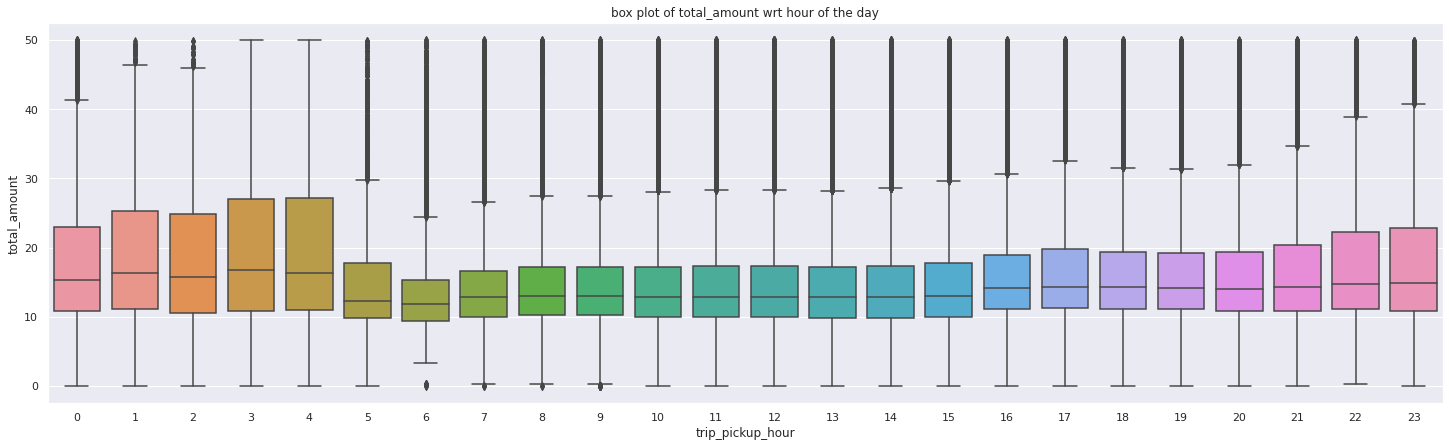

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='total_amount',data=restricted_total_amount_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

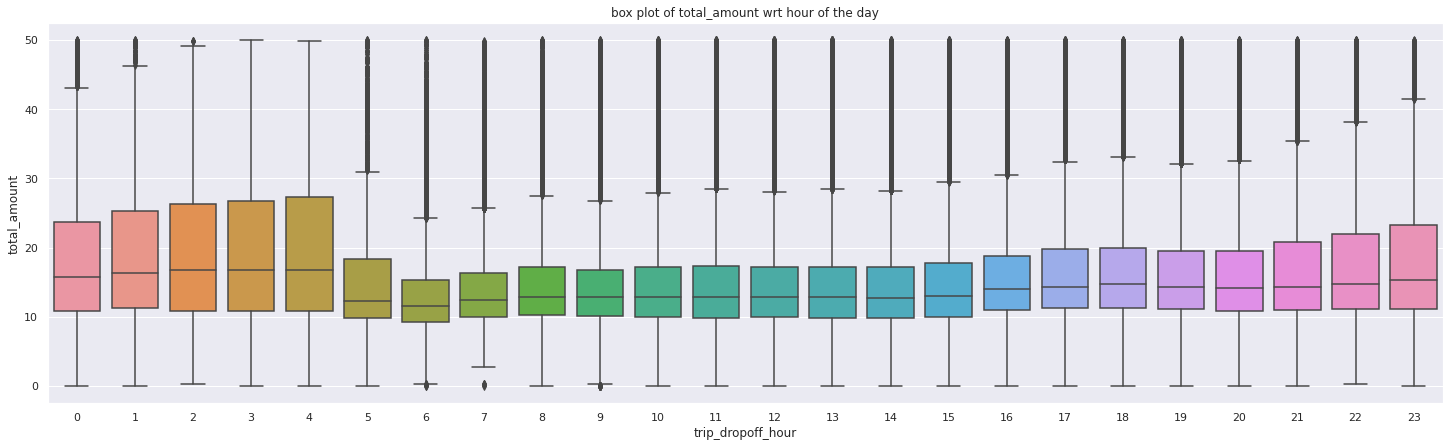

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='total_amount',data=restricted_total_amount_data,ax=ax)
ax.set_title('box plot of total_amount wrt hour of the day')
sns.set()
plt.show()

the pattern of total_amount is same as the pattern we seen in the fare_amount

In [ ]:
restricted_tip_amount_data = trip_data.loc[trip_data['tip_amount']<10]
restricted_total_taxes_data = trip_data.loc[trip_data['total_taxes']<10]

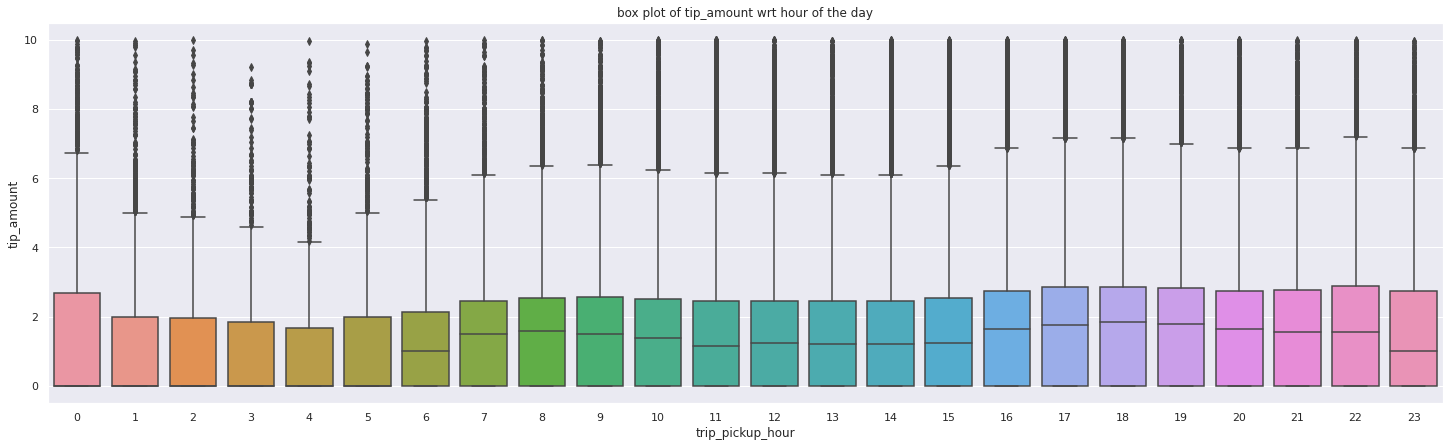

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day')
sns.set()
plt.show()

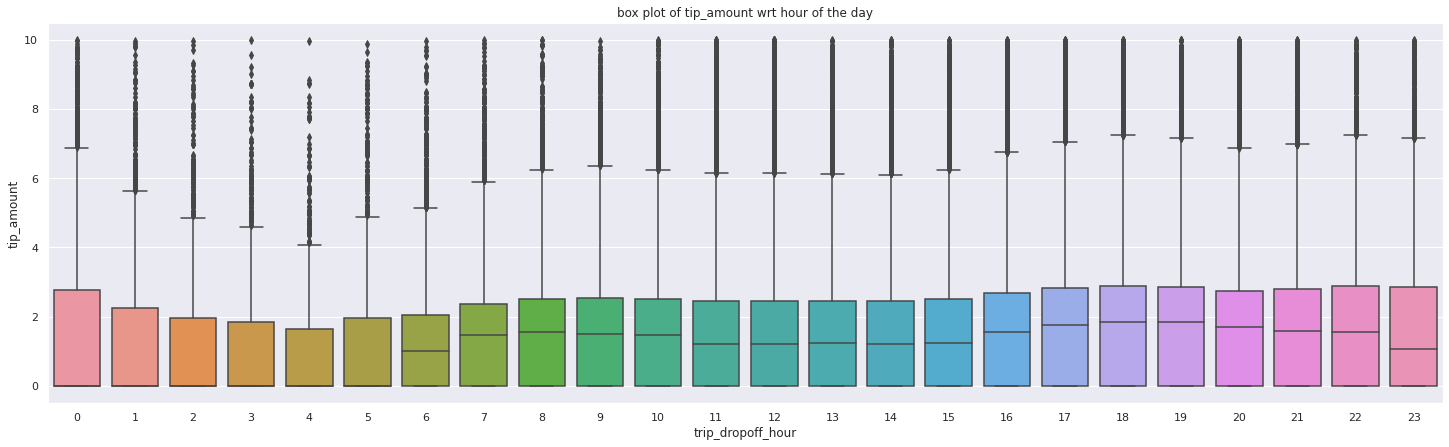

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day')
sns.set()
plt.show()

The median of tip_amount in early morning is mostly zero but IQR is high that means the some of the tip amounts are higher end).

And in between 11 -14 the tip_amount is minimum and almost constant, whereas tip amount is on higher side in evenings.

(Same pattern seen in both the trip_pickup and trip_drop_off)



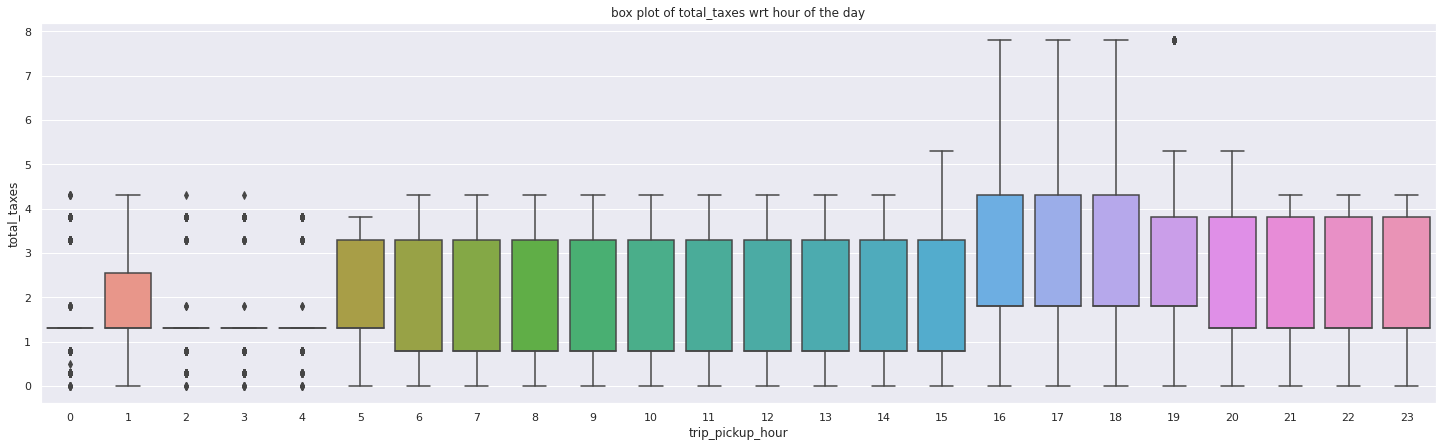

In [ ]:
# total_taxes = extra + improvement_surcharges + Mta

fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='total_taxes',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day')
sns.set()
plt.show()

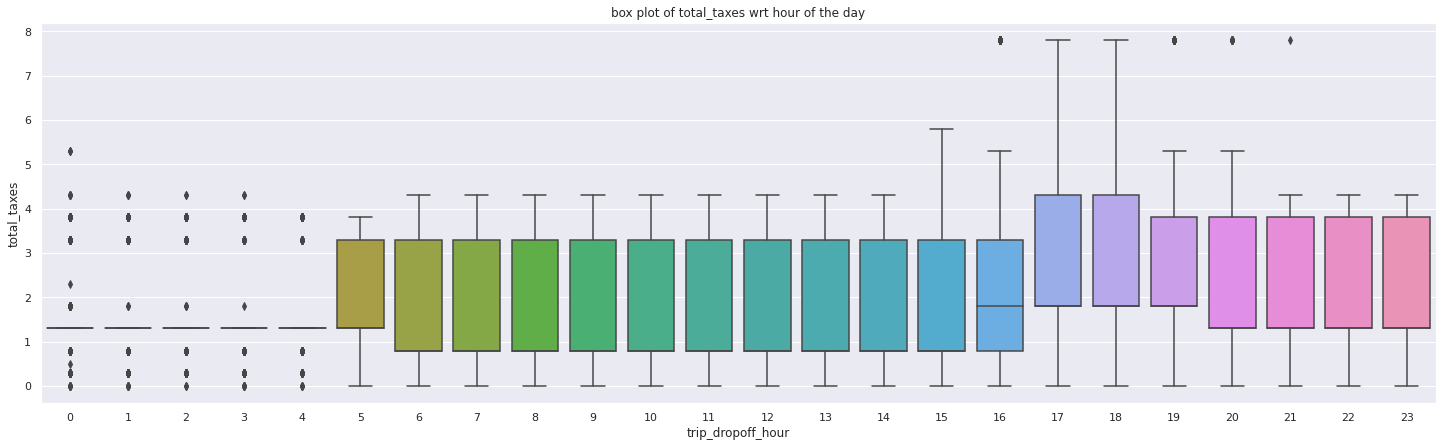

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='total_taxes',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day')
sns.set()
plt.show()

The taxs imposed from 16 to 19 is much higher as compared to the other hours beacue traffic surcharge.

The taxes in the period between 6 to 15 is much lower than the other pick_up hours

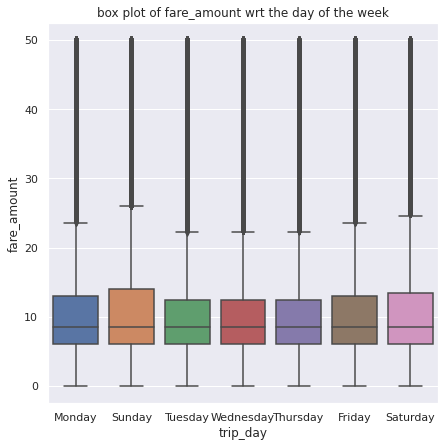

In [ ]:
# plot of trip_day with fare_amount
fig,ax = plt.subplots(figsize=(7,7))
# changes in sns.boxplot x and y
sns.boxplot(x = 'trip_day',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt the day of the week')
sns.set()
plt.show()

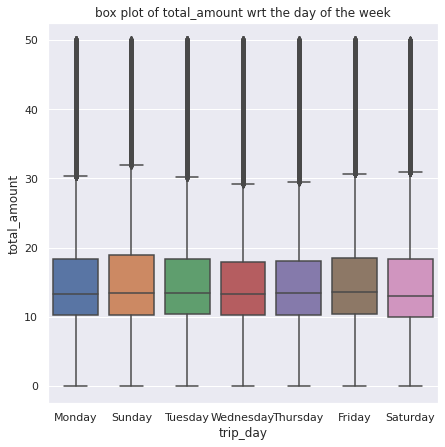

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='total_amount',data=restricted_total_amount_data,ax=ax)
ax.set_title('box plot of total_amount wrt the day of the week')
sns.set()
plt.show()

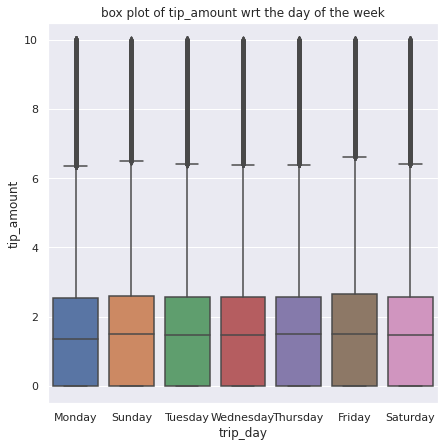

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt the day of the week')
sns.set()
plt.show()

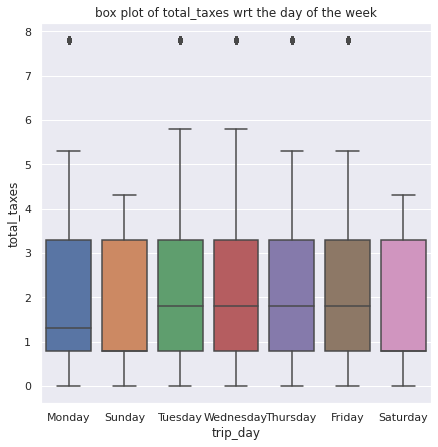

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='total_taxes',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt the day of the week')
sns.set()
plt.show()

We can see that pricing overall does not change much with respect to day of week.but total taxes are higher in weekdays compared to weekands

In [ ]:
# create a new series using value_counts() on 'PULocationID'
pickup_location_value_counts = trip_data['PULocationID'].value_counts()
# show the series
pickup_location_value_counts.head()

236    22458
237    21882
186    19429
140    18589
141    18491
Name: PULocationID, dtype: int64

In [ ]:
# top 10 frequent pickup locations using .nlargest(10).index
top_10_frequent_pickup_locations = pickup_location_value_counts.nlargest(10).index
top_10_frequent_pickup_locations

Int64Index([236, 237, 186, 140, 141, 263, 48, 238, 142, 170], dtype='int64')

The median fare_amount of trips taken from 236 is 7.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


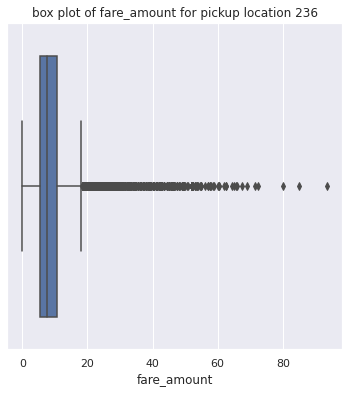

The median fare_amount of trips taken from 237 is 7.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


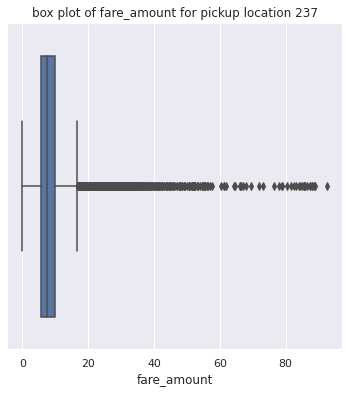

The median fare_amount of trips taken from 186 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


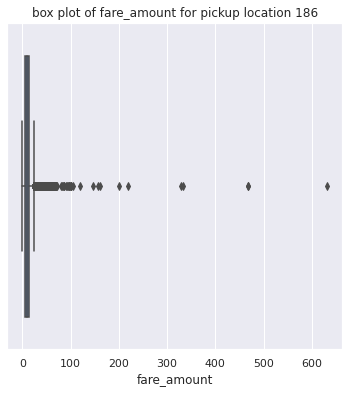

The median fare_amount of trips taken from 140 is 9.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


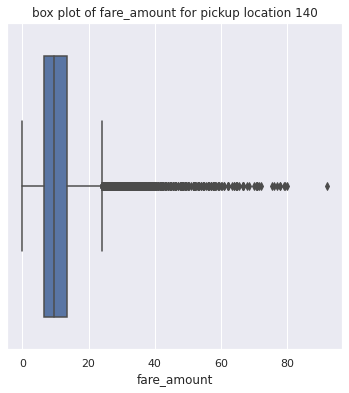

The median fare_amount of trips taken from 141 is 8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


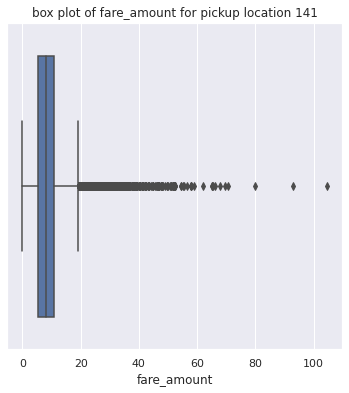

The median fare_amount of trips taken from 263 is 8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


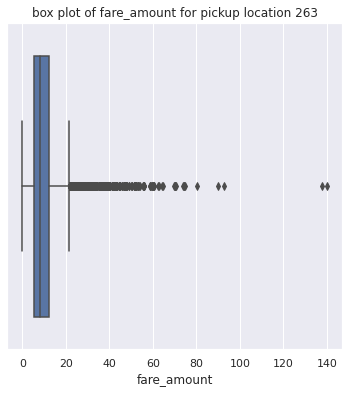

The median fare_amount of trips taken from 48 is 8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


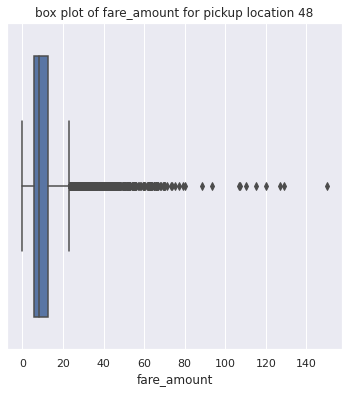

The median fare_amount of trips taken from 238 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


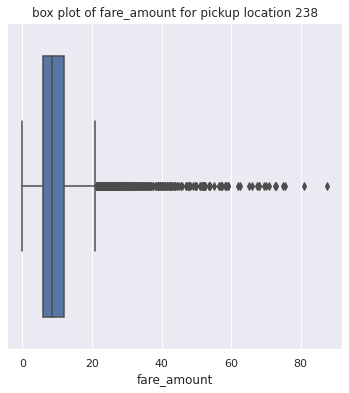

The median fare_amount of trips taken from 142 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


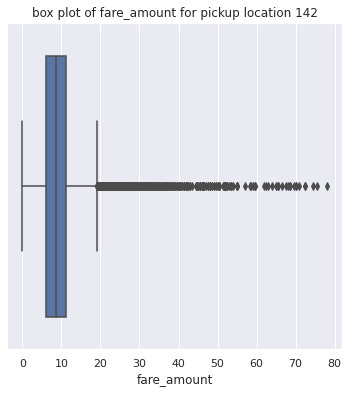

The median fare_amount of trips taken from 170 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


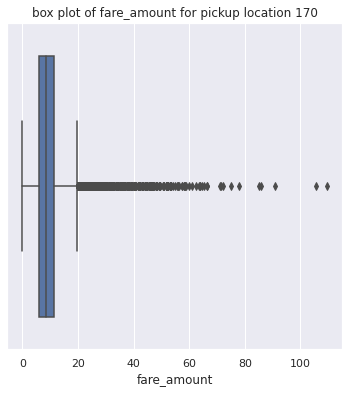

In [ ]:
# for loop for plotting box plot of each of the top 10 frequent pickup locations
for top_pickup_locID in top_10_frequent_pickup_locations:
    # create the new dataframe for each location using .loc on 'PULocationID' - pickup_locID_dataframe
    pickup_locID_dataframe = trip_data.loc[trip_data['PULocationID'] == top_pickup_locID]
    # print the median fare_amount for the top_pickup_locID
    print('The median fare_amount of trips taken from '+str(top_pickup_locID)+' is '+str(pickup_locID_dataframe['fare_amount'].median()))
    # fig,ax object
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of fare_amount from the dataframe pickup_locID_dataframe
    sns.boxplot(pickup_locID_dataframe['fare_amount'],ax=ax)
    # set_title
    ax.set_title('box plot of fare_amount for pickup location '+ str(top_pickup_locID))
    sns.set()
    plt.show()

So from above plot we can observe that for one of the most busiest pickup location i.e 236 has median fare_amount is low in comparison to other busiset location.

It is also observe that the median fare_amount is highest for the location ID 140 which is about 9.5 dollars

This could be helpful in adjusting our revenue expectation based on putting our cabs in a given location because just choosing busy pickup locations for higher revenue won't work, we may have to choose locations taking into consideration both busy traffic and higher median fare_amount.

# DURATION EXPLORATION

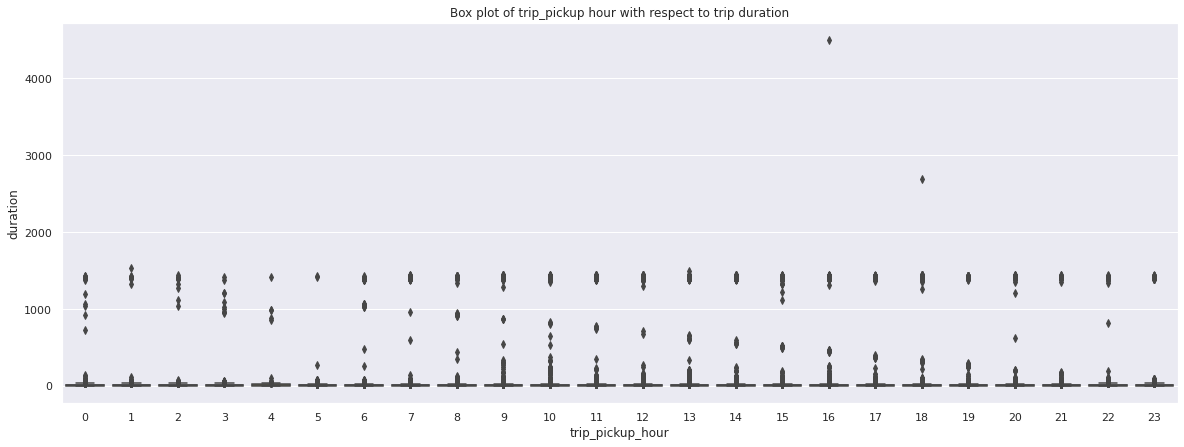

In [ ]:
# plot box plot for duration for different hours of day
fig,ax = plt.subplots(figsize=(20,7))
# box plot using sns.boxplot x is 'trip_pickup_hour' and y is 'duration'
sns.boxplot(x = 'trip_pickup_hour', y='duration',data = trip_data,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration')
sns.set()
plt.show()

In [ ]:
# create restricted_duration dataframe with .loc on 'duration' column
restricted_duration= trip_data.loc[trip_data['duration']<50]
restricted_duration.shape

(491939, 17)

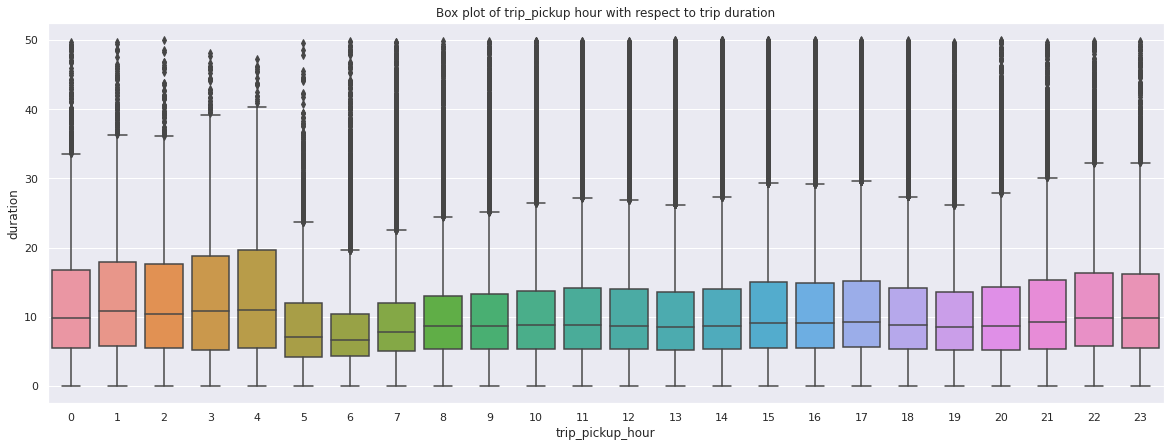

In [ ]:
fig,ax = plt.subplots(figsize=(20,7))
sns.boxplot(x = 'trip_pickup_hour', y='duration',data = restricted_duration,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration')
sns.set()
plt.show()

The duration of trip is higher in the early morning and late nights whereas in pickup_hour 5-7 AM the duration of trip is lowest.

The median trip duration of trips taken from 236 is 7.65


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


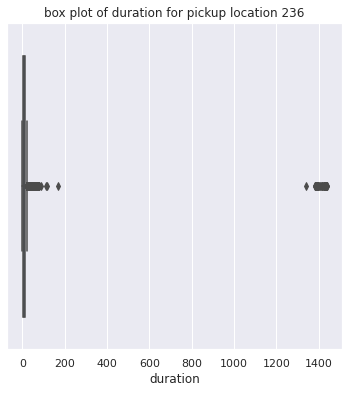

The median trip duration of trips taken from 237 is 7.2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


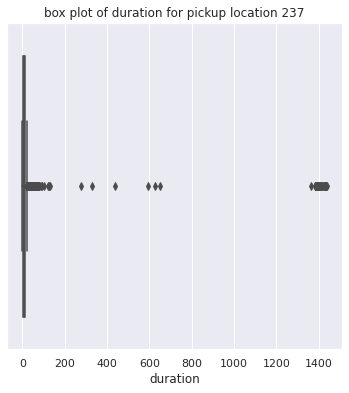

The median trip duration of trips taken from 186 is 8.95


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


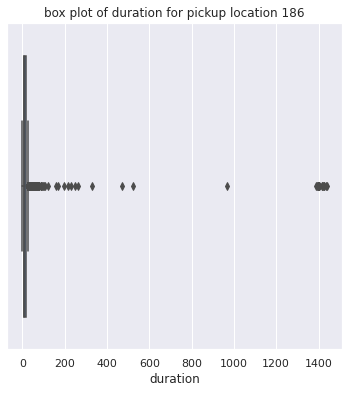

The median trip duration of trips taken from 140 is 9.716666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


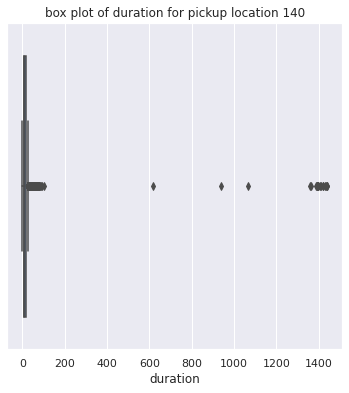

The median trip duration of trips taken from 141 is 7.666666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


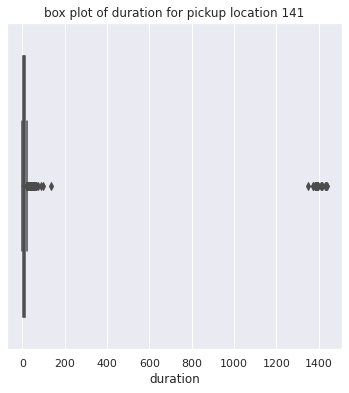

The median trip duration of trips taken from 263 is 7.783333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


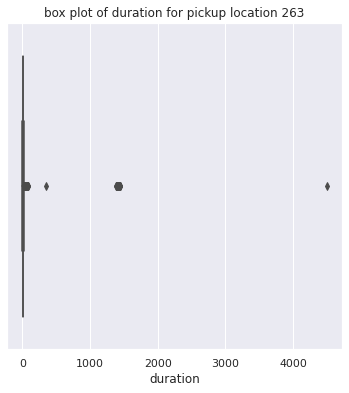

The median trip duration of trips taken from 48 is 8.083333333333334


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


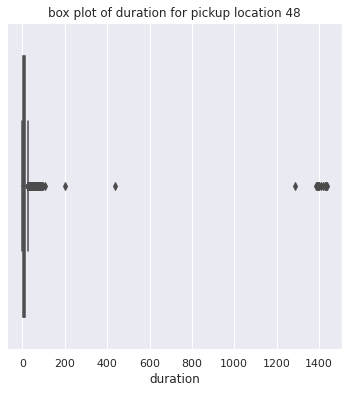

The median trip duration of trips taken from 238 is 8.6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


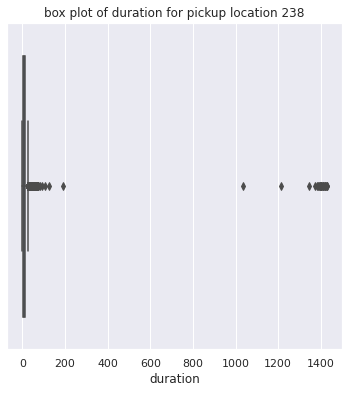

The median trip duration of trips taken from 142 is 8.366666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


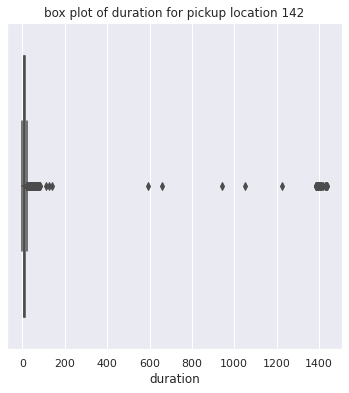

The median trip duration of trips taken from 170 is 8.466666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


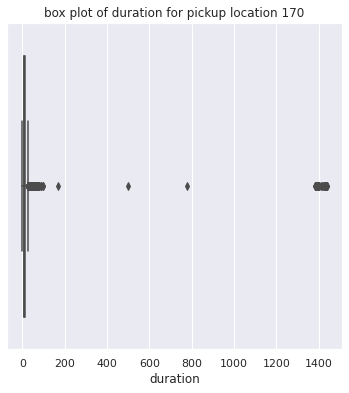

In [ ]:
# plot box plots of duration for top 10 frequent pickup locations
for top_pickup_locID in top_10_frequent_pickup_locations:
    # create the new dataframe for each location using .loc on 'PULocationID' - pickup_locID_dataframe
    pickup_locID_dataframe = trip_data.loc[trip_data['PULocationID'] == top_pickup_locID]
    # print the median duration for the top_pickup_locID
    print('The median trip duration of trips taken from '+str(top_pickup_locID)+' is '+str(pickup_locID_dataframe['duration'].median()))
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe pickup_locID_dataframe
    sns.boxplot(pickup_locID_dataframe['duration'],ax=ax)
    # set_title
    ax.set_title('box plot of duration for pickup location '+ str(top_pickup_locID))
    sns.set()
    plt.show()

As seen from the above plot the busiset location not has the longest duration of trip, but the other busiset location that is 140 has higher duration (thats why that location has higher fare_amount too)

# Analyse routes

We could analyse routes with fare_amount or total_taxes and duration for different time of the day.



In [ ]:
# counting the routes of the trip_data
trip_route_value_counts = trip_data['routes'].value_counts()

In [ ]:
trip_route_value_counts.head(10)

264-264    2759
237-236    2721
236-237    2390
236-236    2346
75-74      2009
237-237    1928
75-75      1813
263-75     1746
263-141    1658
236-75     1655
Name: routes, dtype: int64

In [ ]:
# 10 busiest routes in trip_data
trip_route_top_10 = trip_route_value_counts.nlargest(10).index

In [ ]:
trip_route_top_10

Index(['264-264', '237-236', '236-237', '236-236', '75-74', '237-237', '75-75',
       '263-75', '263-141', '236-75'],
      dtype='object')

the fare amount for the route 264-264 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


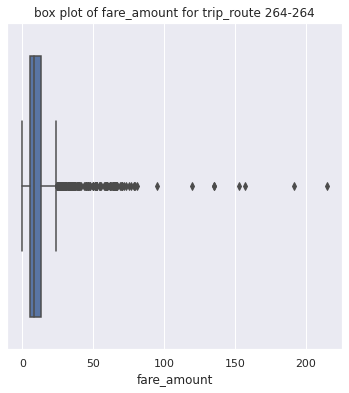

the fare amount for the route 237-236 is 6.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


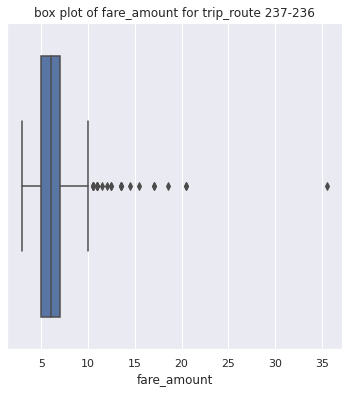

the fare amount for the route 236-237 is 6.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


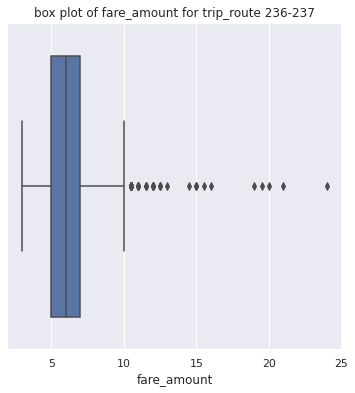

the fare amount for the route 236-236 is 4.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


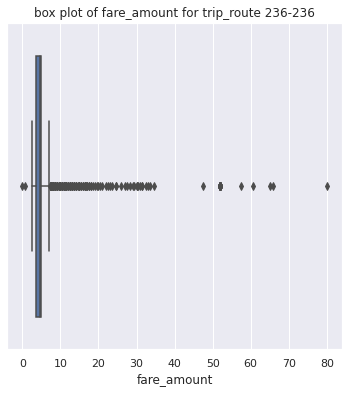

the fare amount for the route 75-74 is 6.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


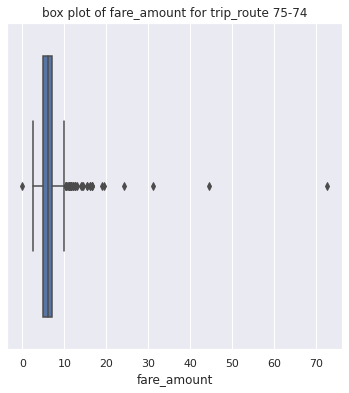

the fare amount for the route 237-237 is 4.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


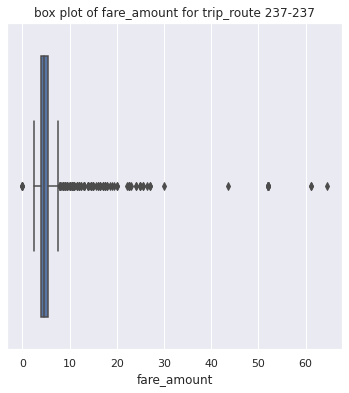

the fare amount for the route 75-75 is 4.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


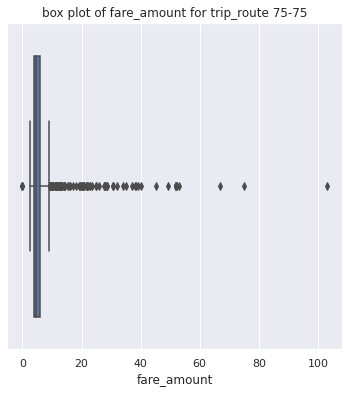

the fare amount for the route 263-75 is 5.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


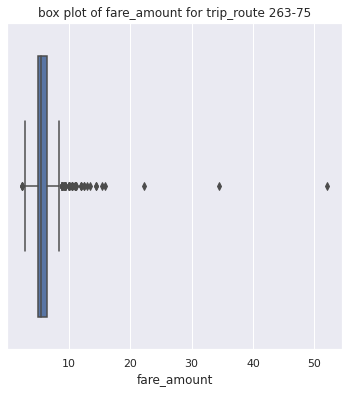

the fare amount for the route 263-141 is 5.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


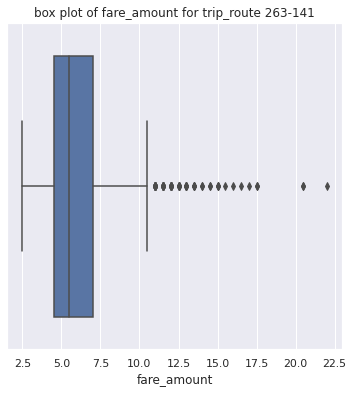

the fare amount for the route 236-75 is 5.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


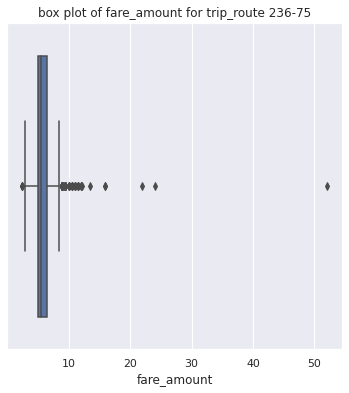

In [ ]:
for trip_route in trip_route_top_10:
    # creating new data frame with trip_route.
    trip_route_df = trip_data.loc[trip_data['routes'] == trip_route]
    #print median fare_amount for the respective route
    print("the fare amount for the route " + trip_route +' '+ 'is ' + str(trip_route_df['fare_amount'].median()))
    #plotting boxplot 
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe pickup_locID_dataframe
    sns.boxplot(trip_route_df['fare_amount'],ax=ax)
    # set_title
    ax.set_title('box plot of fare_amount for trip_route '+ str(trip_route ))
    sns.set()
    plt.show()

From above plot it is clear that the busiset route does not assure you about the highest revenue. as seen from the graph fare amount for the buisest trip_rout 237-236 is lower than the other Busiset trip_routes.



the trip_route 264-264 has the highest fare_amount of 8.5 median.Its worthnoting that these route should be kept in mind for business prospect.

the fare amount for the route 264-264 is 0.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


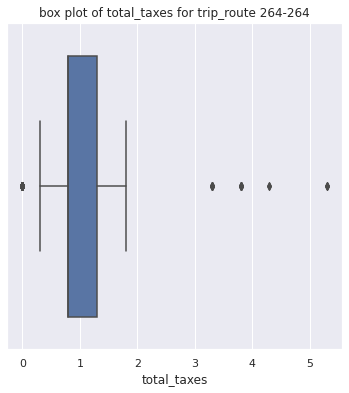

the fare amount for the route 237-236 is 1.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


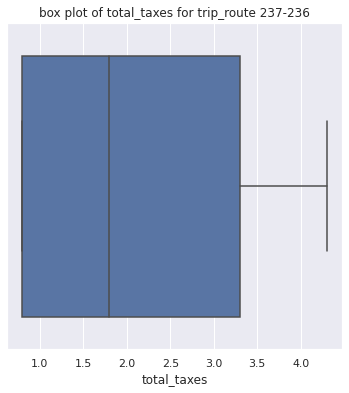

the fare amount for the route 236-237 is 1.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


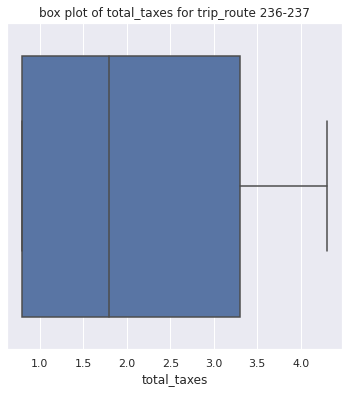

the fare amount for the route 236-236 is 1.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


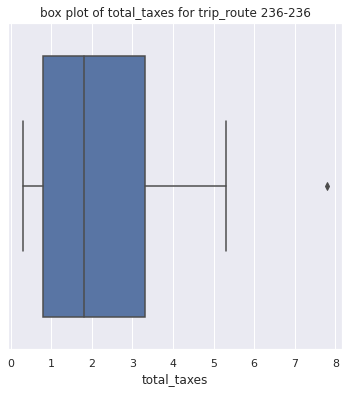

the fare amount for the route 75-74 is 0.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


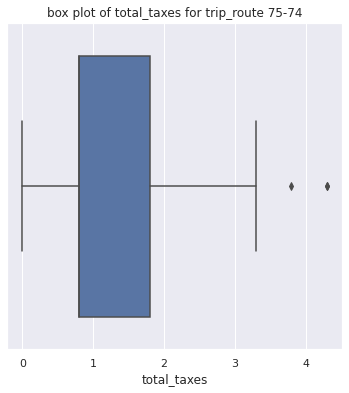

the fare amount for the route 237-237 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


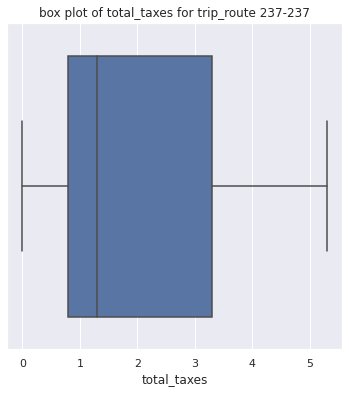

the fare amount for the route 75-75 is 0.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


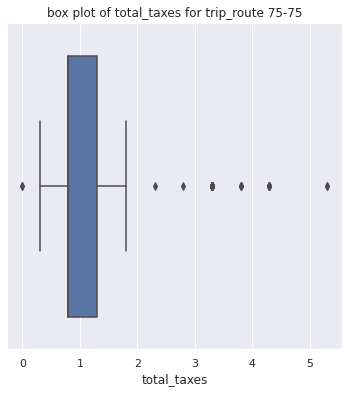

the fare amount for the route 263-75 is 1.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


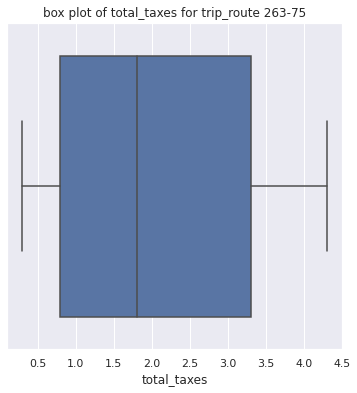

the fare amount for the route 263-141 is 1.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


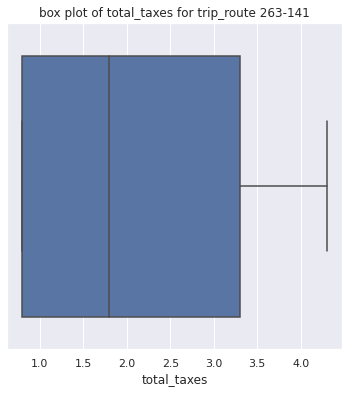

the fare amount for the route 236-75 is 1.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


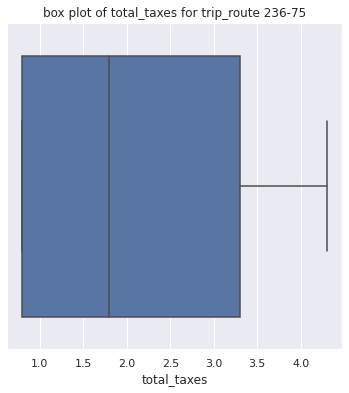

In [ ]:
for trip_route in trip_route_top_10:
    # creating new data frame with trip_route.
    trip_route_df = trip_data.loc[trip_data['routes'] == trip_route]
    #print median total_taxes for the respective route
    print("the fare amount for the route " + trip_route +' '+ 'is ' + str(trip_route_df['total_taxes'].median()))
    #plotting boxplot 
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe pickup_locID_dataframe
    sns.boxplot(trip_route_df['total_taxes'],ax=ax)
    # set_title
    ax.set_title('box plot of total_taxes for trip_route '+ str(trip_route ))
    sns.set()
    plt.show()

From the above plot it is clearly vissible almost all routes has same total_tax of 1.3 and 1.8 dollars, but the trip_route 264-264 and 75-74 lowest total_tax i.e 0.8 dollars as well.

As we seen from fare_amount plot of routes, the 264-264 route has higher fare amount as compared to other routes but it could be higher because of lower taxes applied on the these route as shown in above plot. as it has lowest total_tax value of 0.8 dollars

the duration for the route 264-264 is 6.966666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


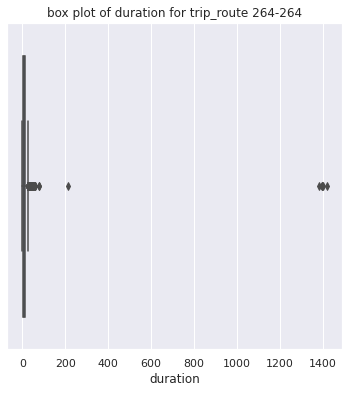

the duration for the route 237-236 is 5.016666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


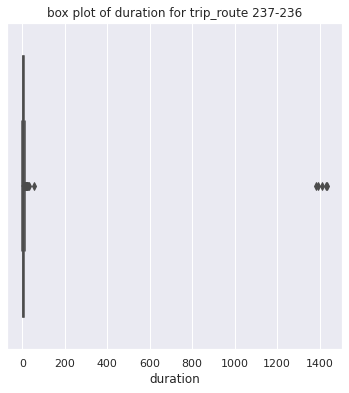

the duration for the route 236-237 is 5.533333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


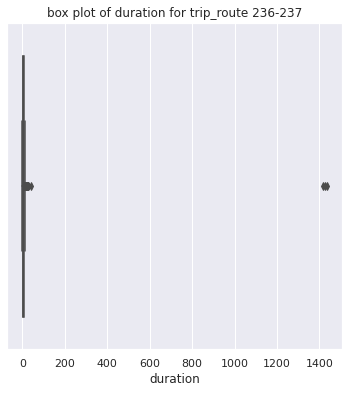

the duration for the route 236-236 is 3.183333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


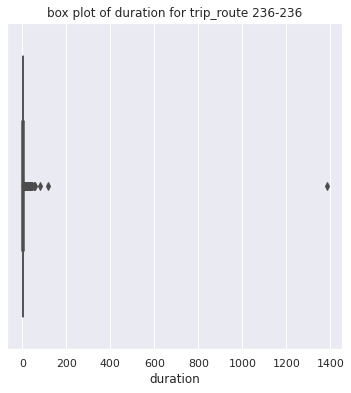

the duration for the route 75-74 is 5.183333333333334


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


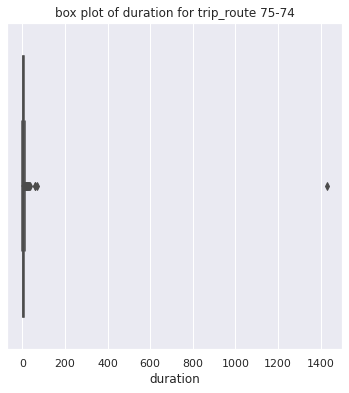

the duration for the route 237-237 is 3.65


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


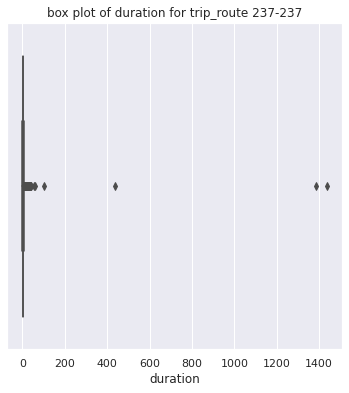

the duration for the route 75-75 is 3.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


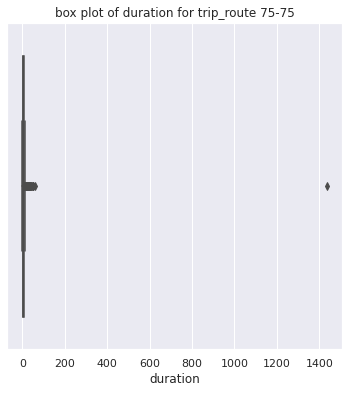

the duration for the route 263-75 is 4.933333333333334


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


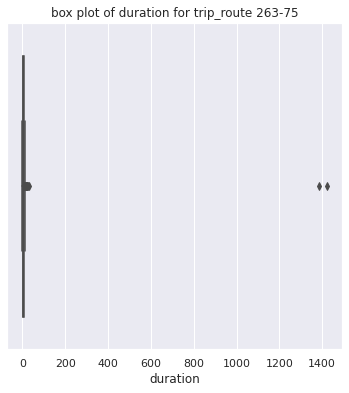

the duration for the route 263-141 is 4.533333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


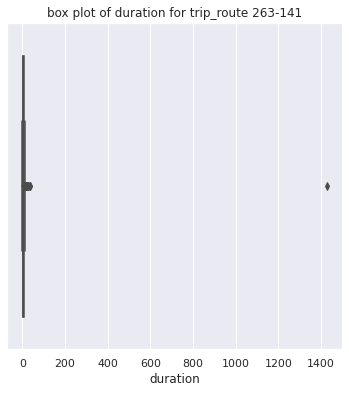

the duration for the route 236-75 is 4.566666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


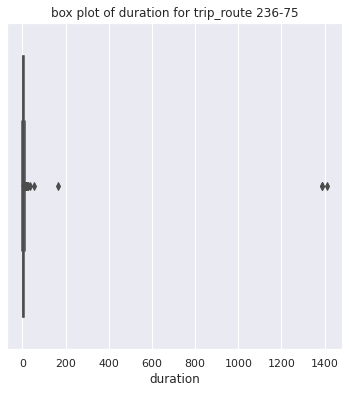

In [ ]:
for trip_route in trip_route_top_10:
    # creating new data frame with trip_route.
    trip_route_df = trip_data.loc[trip_data['routes'] == trip_route]
    #print median total_taxes for the respective route
    print("the duration for the route " + trip_route +' '+ 'is ' + str(trip_route_df['duration'].median()))
    #plotting boxplot 
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe  trip_route_df 
    sns.boxplot(trip_route_df['duration'],ax=ax)
    # set_title
    ax.set_title('box plot of duration for trip_route '+ trip_route)
    sns.set()
    plt.show()

As seen from the above plot that the busisest location 264-264 has 6.96,  highest duration as compared other busisest location.



# FINAL RESULTS FROM EDA

fare_amount - most of the fare amount is within 8.5 dollar 
value as is shown by the median value. Though there are some significant outliers, the maximum of which is beyond 940 dollars.

tip_amount - most of the tip amount is within 1.5 dollar as is shown by the median value. Though again here too we have outliers, the maximum of which is around 400 dollars.

tolls_amount - most of the tolls_amount value is 0 so it seems most of the trips do not have to pay for tolls.

total_taxes - most of the total_taxes values is within 1.3 dollars as is shown by the median value. There is very less outliers.

total_amount - most of the total_amount values is within 14 dollars as is shown by the median value. Again the outliers in this case seems mostly because of outliers in fare_amount.some Heavy outlier exist of 1100 dollar

duration - most of the values in duration is within 8.86 minutes range as is shown by the median value. We do have some outliers which are beyond the range of 4000 minutes.

trip_distance - most of the trip_distance is within 1.7 miles value as is shown by the median. only a heavy outliers exit of around 22k miles.

most of the payments are done through cash and credit cards. The proportion of credit card payments is around 70%.

Trip Hour 

1) The dropoff and pick up hour distribution looks almost same, it is because the trip duration in most of the cases is less than an hour with the median duration value within 9 min.

2) Peak hour for the pick up and drop off is around evening from 13 to 16. The busiest time is 15 PM.

3) There is less traffic during night times and only after 8AM in morning does the pickup and drop off starts picking up pace.

Trip day

1)Sunday has the lowest taxi uses while Tuesday is the busiest.

2)Weekdays have heavy taxi uses compared to the weekands

location_ID-The busiest location in terms of pickup are 236 and 237

The busiest location for dropoff too are 236 , 237 and 79 busiest locations but 236 is far more busiest than the other two in drop_off hour.

The mostly 1 or 2 passengers avail the cab. The instance of large group of people travelling together is rare.


The fare_amount in late nigth is comparitively higher than the rest of the hours(same pattern seen in both the cases).

Also the median fare_amount between 5 - 6 is less than all others hours of the day(seen in bothe cases)

The median of tip_amount in early morning is mostly zero.And in between 11 -14 the tip_amount is minimum and almost constant, whereas tip amount is on higher side in evenings.

The taxs imposed from 16 to 19 is much higher as compared to the other hours beacue traffic surcharge.

The taxes in the period between 6 to 15 is much lower than the other pick_up hours

Pricing overall does not change much with respect to day of week.But total taxes are higher in weekdays compared to weekands

For one of the most busiest pickup location i.e 236 has median fare_amount is low in comparison to other busiset location.

It is also observe that the median fare_amount is highest for the location ID 140 which is about 9.5 dollars

This could be helpful in adjusting our revenue expectation based on putting our cabs in a given location because just choosing busy pickup locations for higher revenue won't work, we may have to choose locations taking into consideration both busy traffic and higher median fare_amount.

The duration of trip is higher in the early morning and late nights whereas in pickup_hour 5-7 AM the duration of trip is lowest.

The busiset location not has the longest duration of trip, but the other busiset location that is 140 has higher duration (thats why that location has higher fare_amount too)

The busiset route does not assure you about the highest revenue. as seen from the graph fare amount for the buisest trip_rout 237-236 is lower than the other Busiset trip_routes.

The trip_route 264-264 has the highest fare_amount of 8.5 median.Its worthnoting that these route should be kept in mind for business prospect.

Almost all routes has same total_tax of 1.3 and 1.8 dollars, but the trip_route 264-264 and 75-74 lowest total_tax i.e 0.8 dollars as well.

As we seen from fare_amount plot of routes, the 264-264 route has higher fare amount as compared to other routes but it could be higher because of lower taxes applied on the these route as shown in above plot. as it has lowest total_tax value of 0.8 dollars

The busisest location 264-264 has 6.96, highest duration as compared other busisest location.
